In [1]:
# notebook to produce he2149 lightcurve plots:

import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [2]:
# load results:

def diffdata(file):
    time,magA,magA_err,magB,magB_err,sky,residue,chi2red = \
    np.loadtxt(file,skiprows=4,usecols=(1,7,8,9,10,11,13,14),unpack=True)
    return time,magA,magA_err,magB,magB_err,sky,residue,chi2red
def refdata(file):
    time,magA,magA_err,magB,magB_err,sky,residue,chi2red = \
    np.loadtxt(file,skiprows=2,max_rows=1,usecols=(1,7,8,9,10,11,13,14),unpack=True)
    return time,magA,magA_err,magB,magB_err,sky,residue,chi2red

data_file_name = 'diffgalfitresults_betterpos.txt'
R_all = diffdata('R/diff_galfit/'+data_file_name)
R_ref = refdata('R/diff_galfit/'+data_file_name)
V_all = diffdata('V/diff_galfit/'+data_file_name)
V_ref = refdata('V/diff_galfit/'+data_file_name)

In [3]:
# flux to magnitues:

def mag(alldata,refdata,offset):
    time     = alldata[0]
    magA_err = 2.5/np.log(10)*np.sqrt(alldata[2]**2+refdata[2]**2)/(alldata[1]+refdata[1])
    magB_err = 2.5/np.log(10)*np.sqrt(alldata[4]**2+refdata[4]**2)/(alldata[3]+refdata[3])
    magA     = -2.5*np.log10(alldata[1]+refdata[1]) + offset
    magB     = -2.5*np.log10(alldata[3]+refdata[3]) + offset
    return time,magA,magA_err,magB,magB_err

# Offset (determined from reference stars with known apperent GAIA magnitudes in the reference image):
R_offset  = 27.024
V_offset  = 29.209

R_mag = mag(R_all,R_ref,R_offset)
V_mag = mag(V_all,V_ref,V_offset)

In [4]:
def plot(mag,offsetA=0.0,offsetB=0.0,lable1='',lable2='',sym1='o',sym2='o',timedelay=0.0):
    plt.errorbar(mag[0],mag[1]+offsetA,yerr=mag[2],fmt=sym1,markersize=4,elinewidth=1,capsize=3,label=lable1)
    plt.errorbar(mag[0]+timedelay,mag[3]+offsetB,yerr=mag[4],fmt=sym2,markersize=4,elinewidth=1,capsize=3,label=lable2)

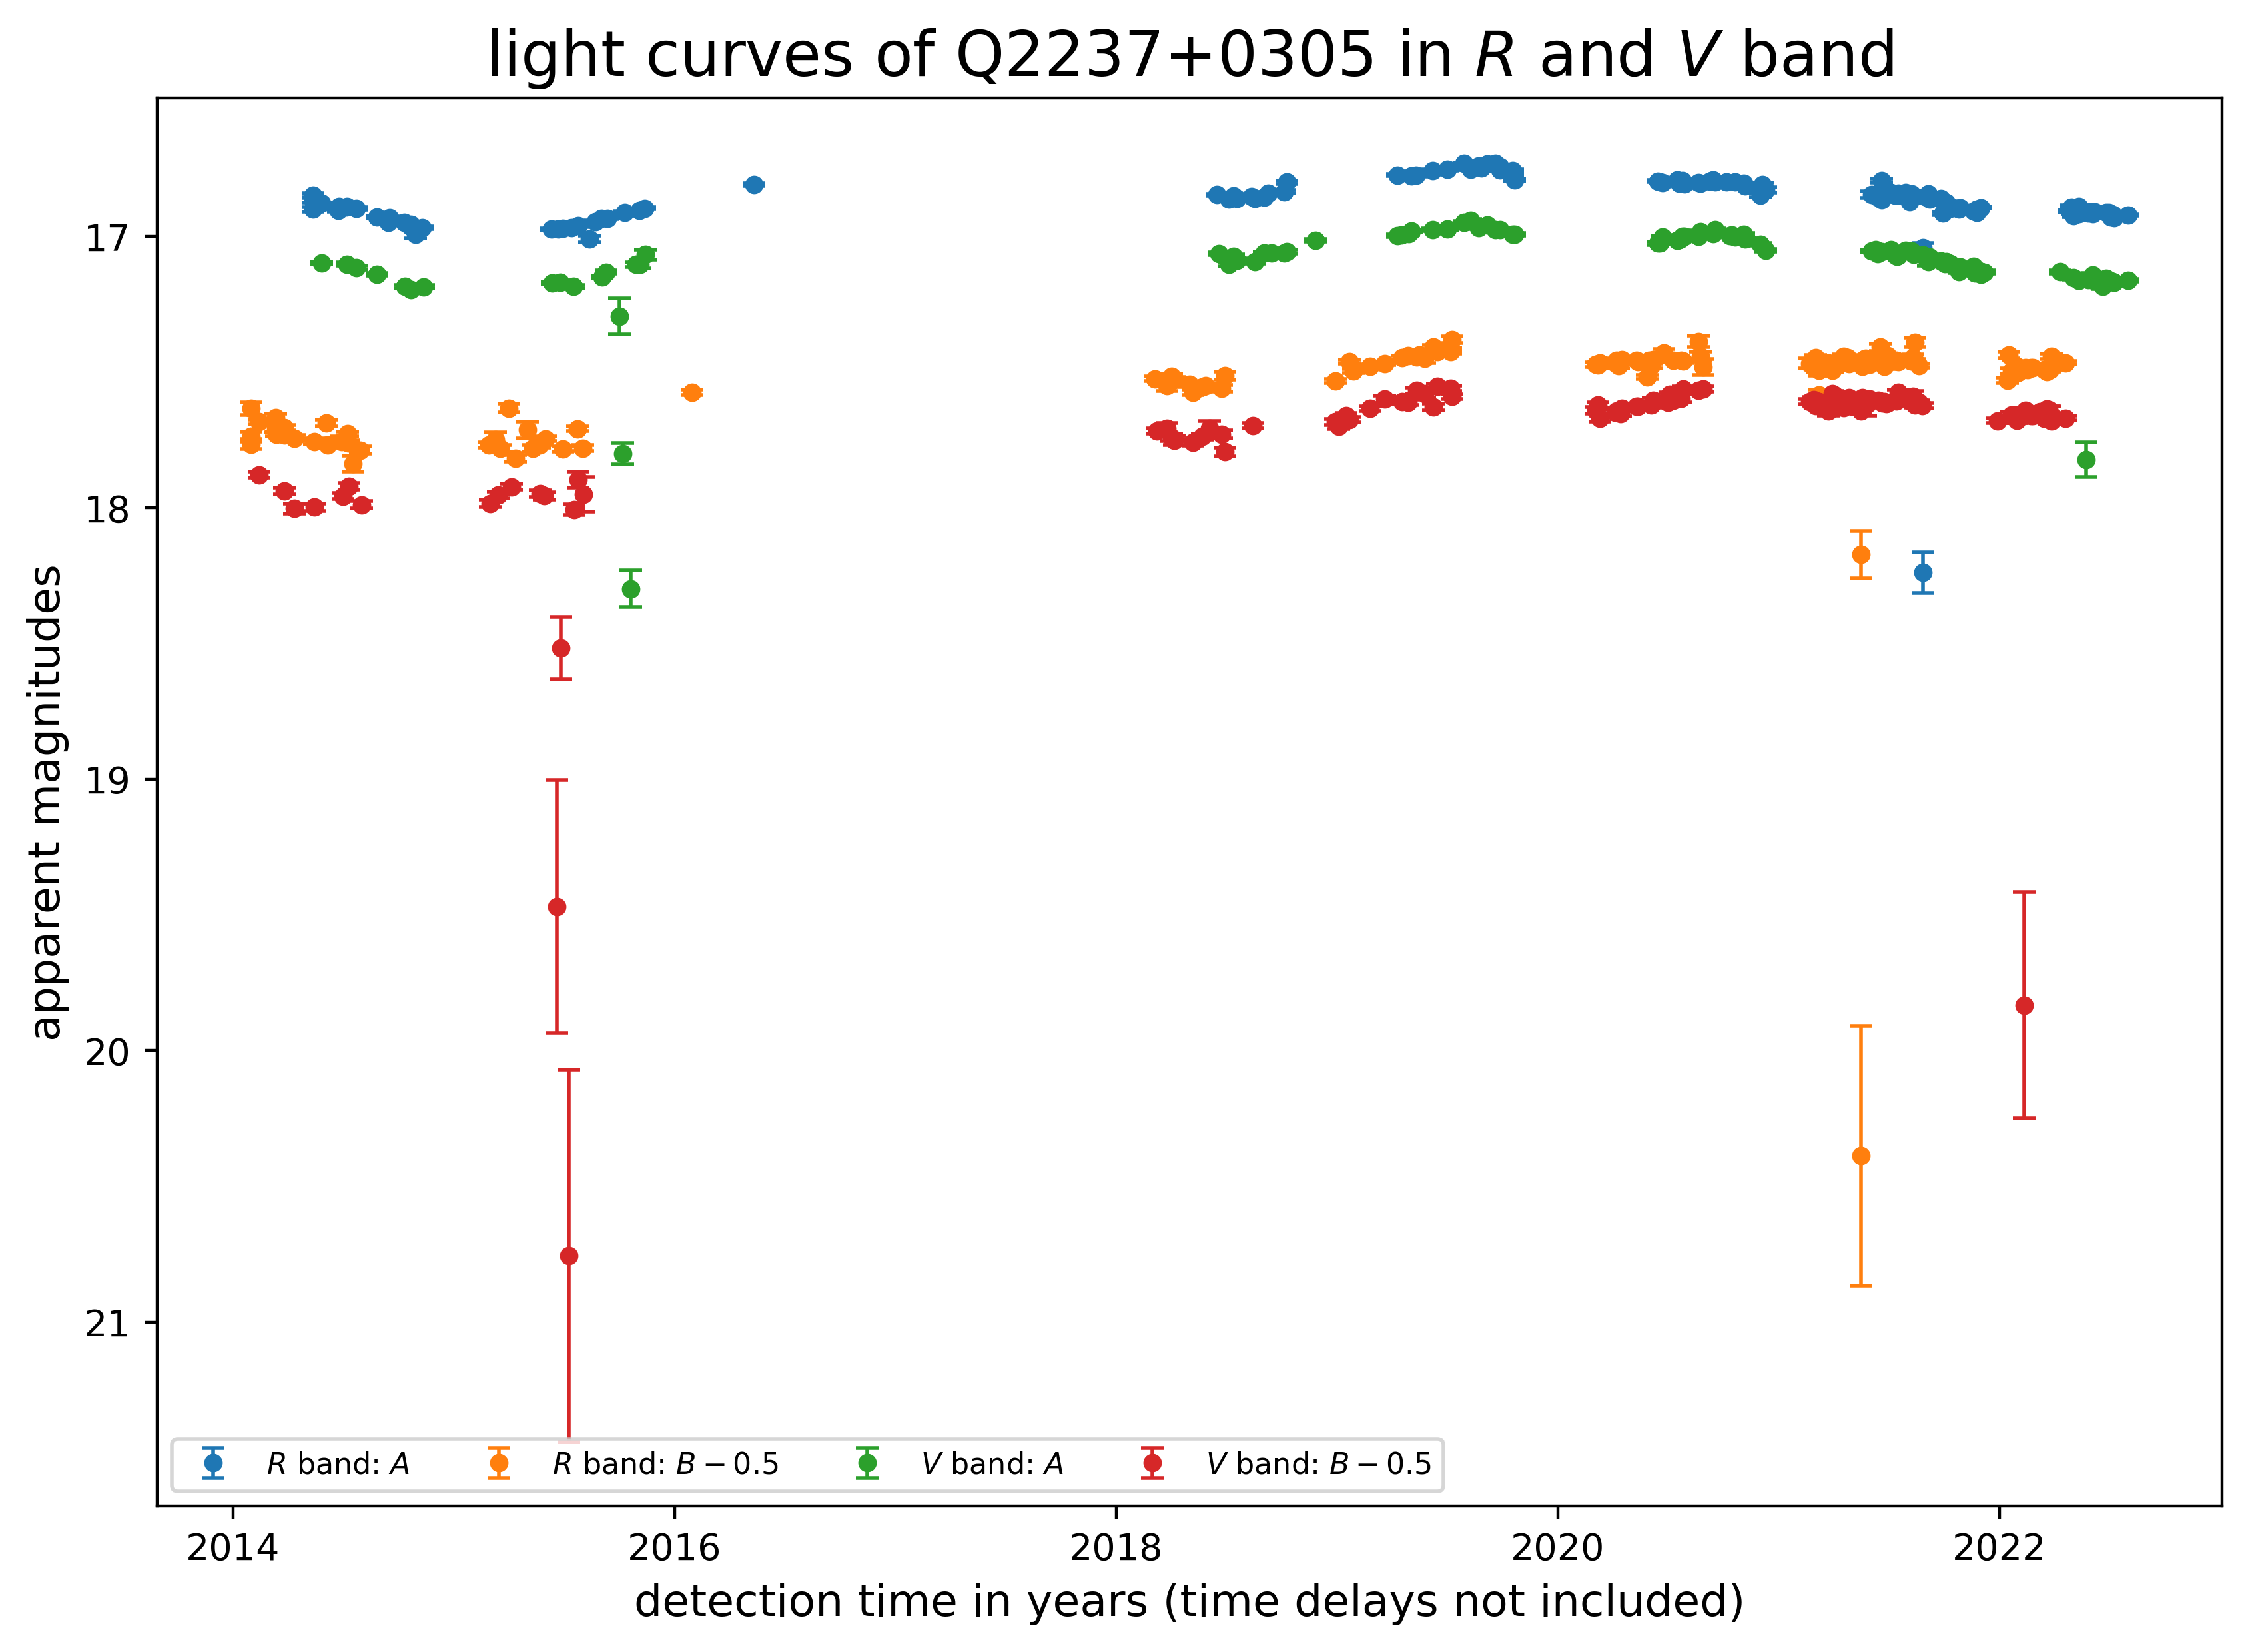

In [5]:
plt.figure(figsize=(10,7),dpi=400)
plt.title('light curves of Q2237+0305 in $R$ and $V$ band',size=17)
plot(R_mag,0.0,-0.5,'$R$ band: $A$','$R$ band: $B-0.5$',timedelay=-103.0/365.25)
plot(V_mag,0.0,-0.5,'$V$ band: $A$','$V$ band: $B-0.5$',timedelay=-103.0/365.25)
plt.gca().invert_yaxis()
plt.xlabel('detection time in years (time delays not included)',size=12)
plt.ylabel('apparent magnitudes',size=12)
plt.legend(fontsize=8,loc='lower left',ncol=4)

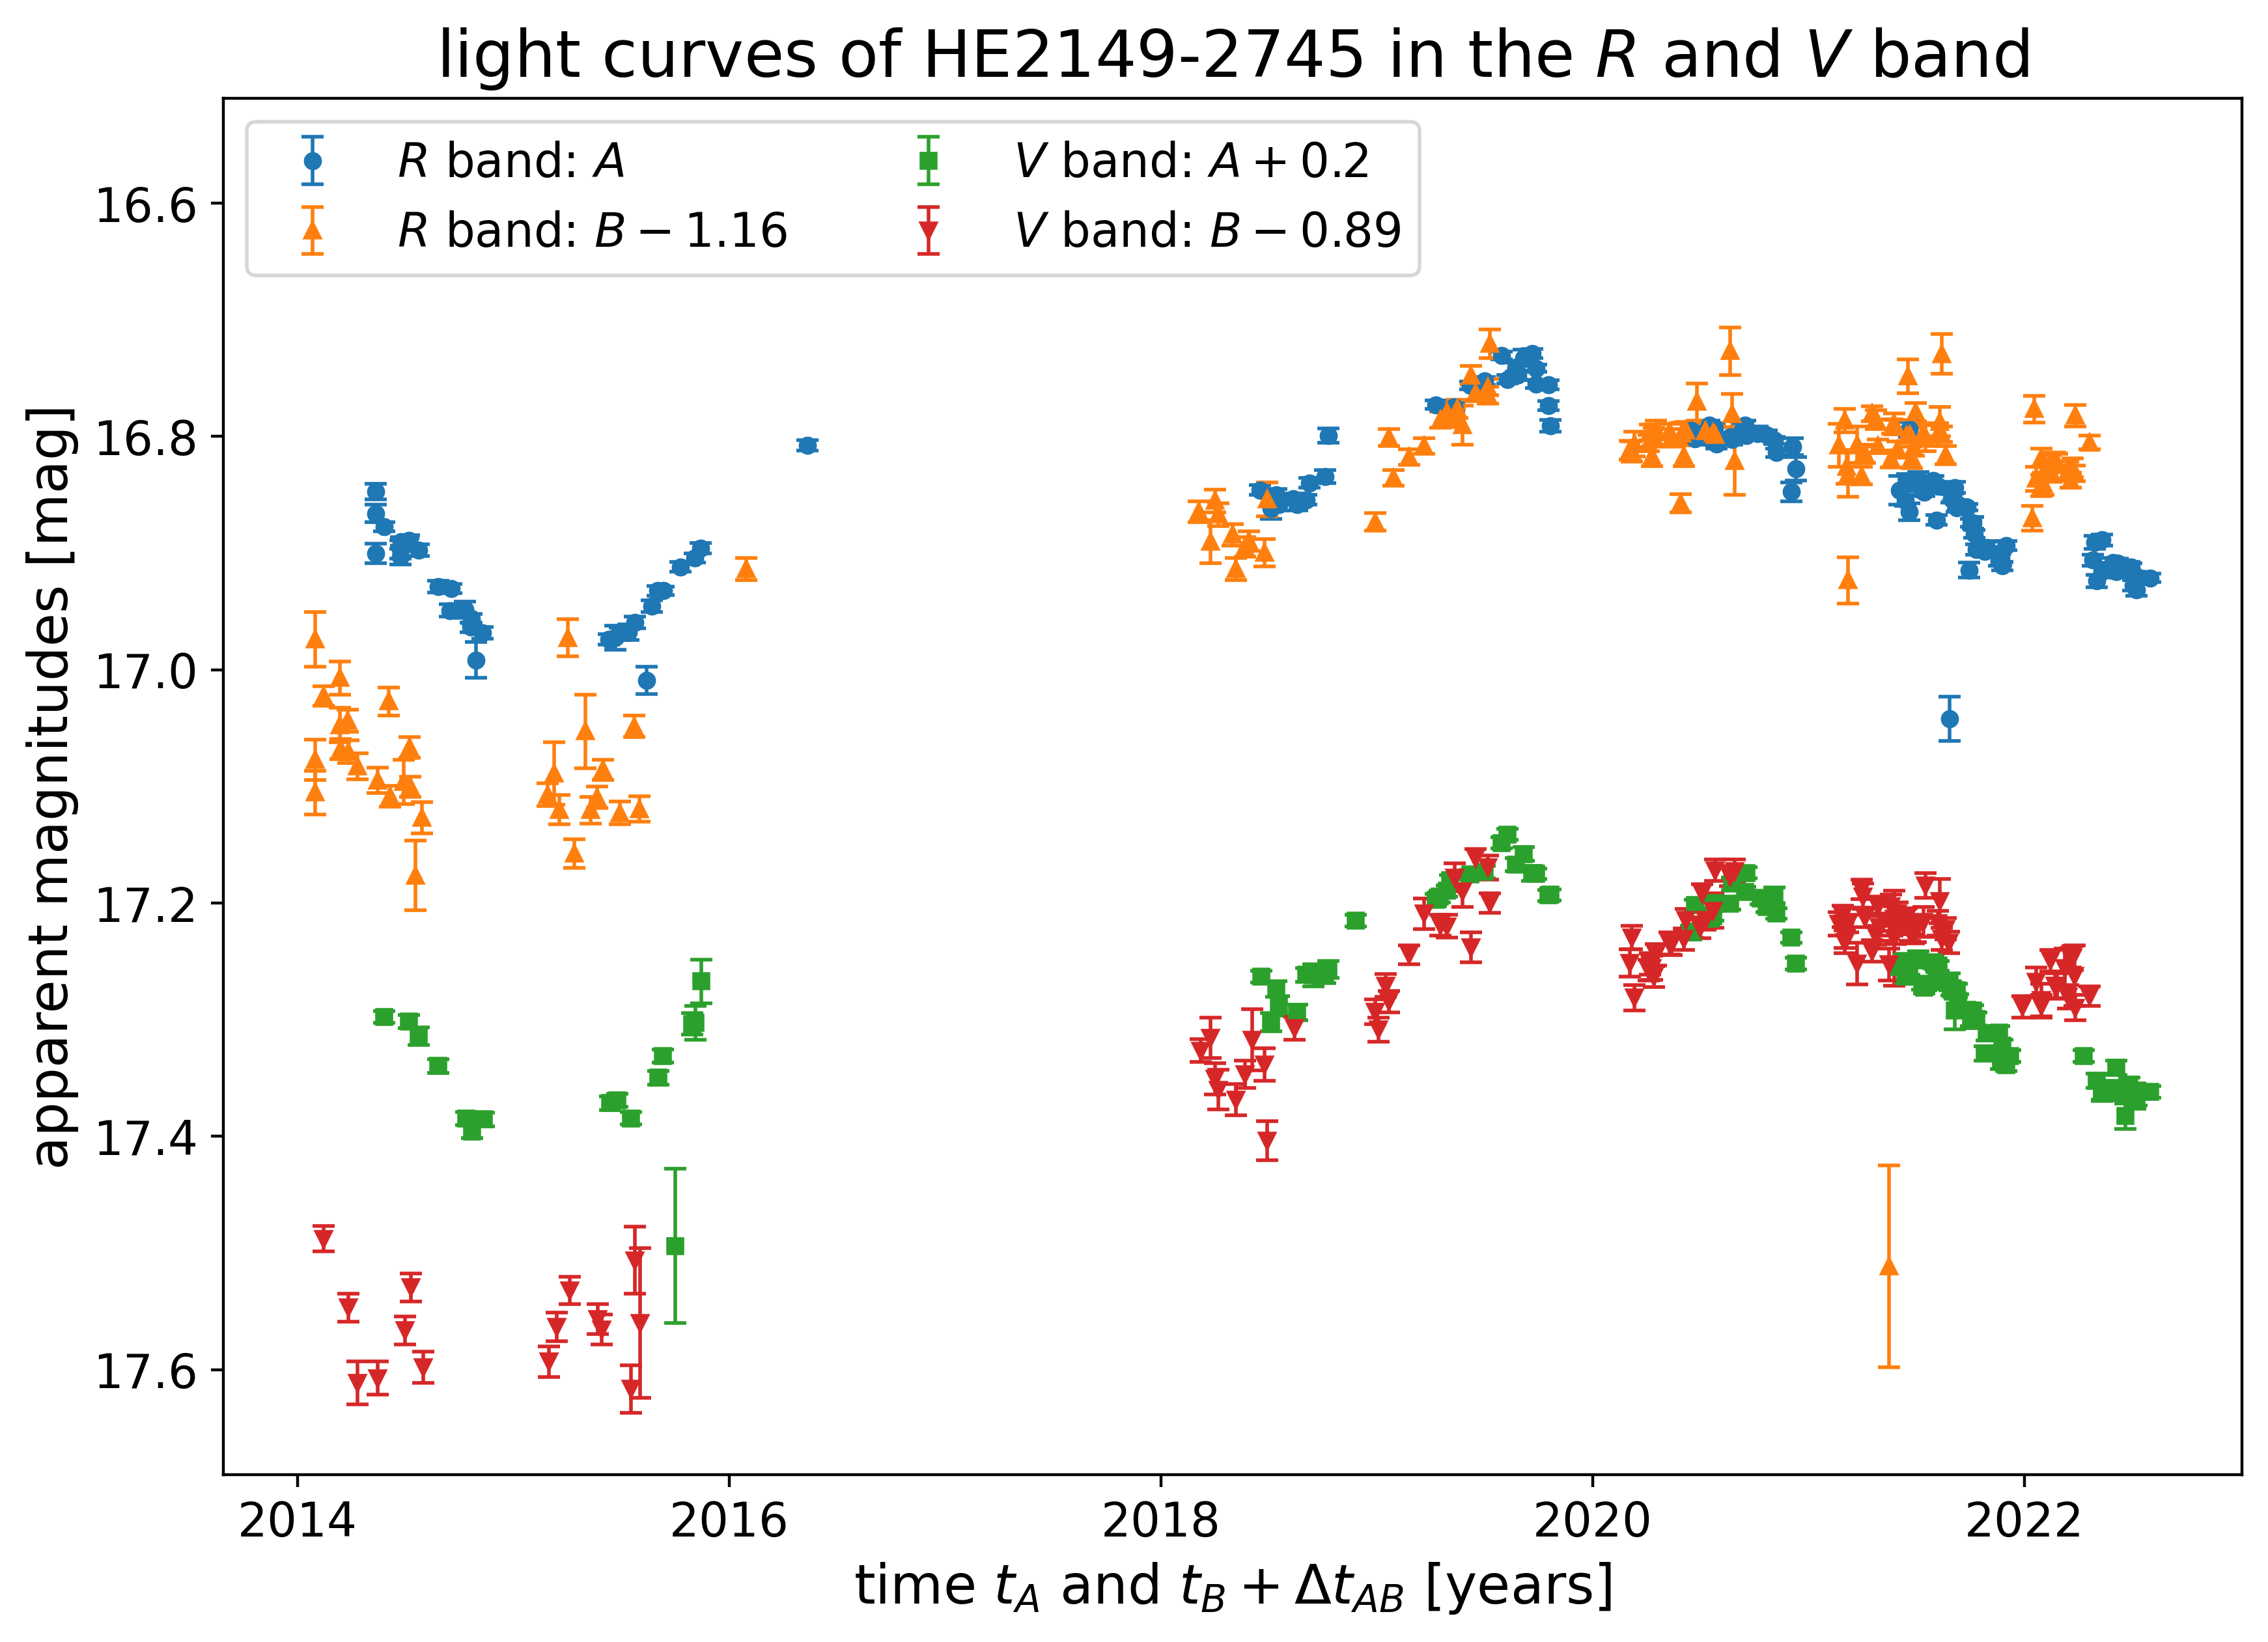

In [6]:
plt.figure(figsize=(10,7),dpi=400)
plt.title('light curves of HE2149-2745 in the $R$ and $V$ band',size=18)
plot(R_mag,0.0,-1.16,'$R$ band: $A$','$R$ band: $B-1.16$','o','^',-103.0/365.25)
plot(V_mag,0.2,-0.89,'$V$ band: $A+0.2$','$V$ band: $B-0.89$','s','v',-103.0/365.25)
plt.ylim([16.51,17.69])
plt.gca().invert_yaxis()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('time $t_A$ and $t_B+\Delta t_{AB}$ [years]',size=15)
plt.ylabel('apparent magnitudes [mag]',size=15)
plt.legend(fontsize=13,loc='upper left',ncol=2)

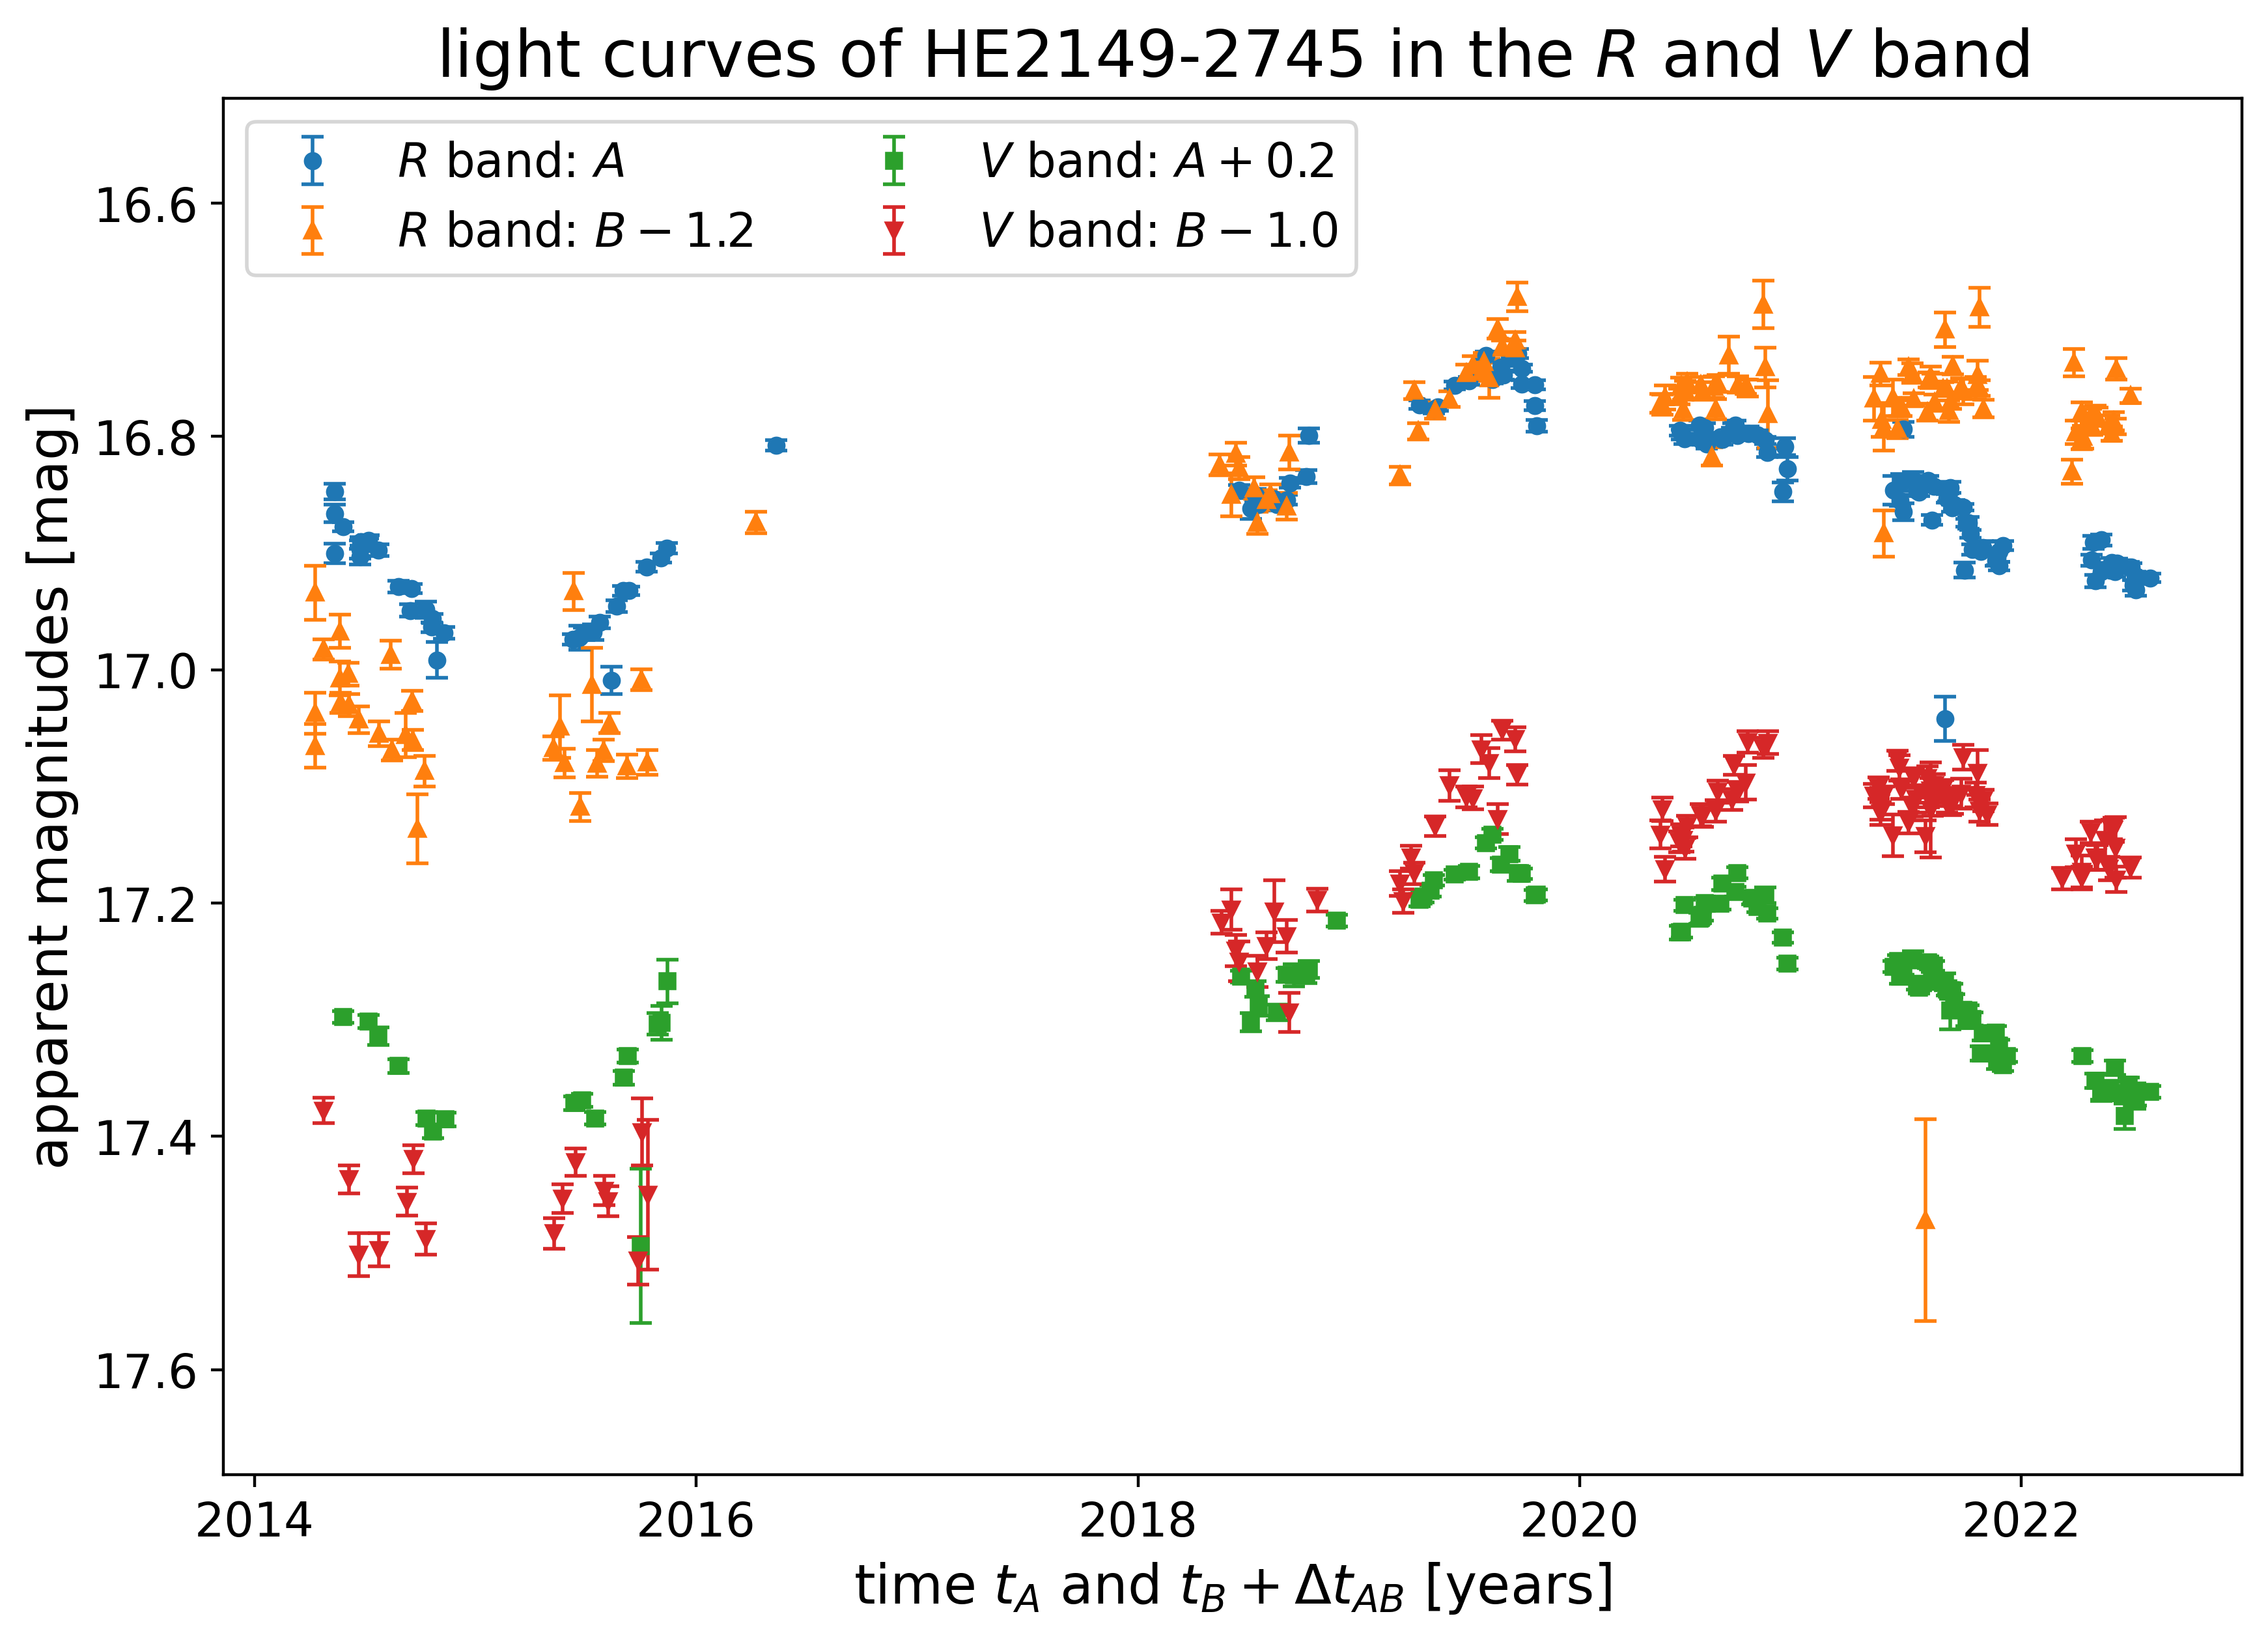

In [7]:
plt.figure(figsize=(10,7),dpi=400)
plt.title('light curves of HE2149-2745 in the $R$ and $V$ band',size=18)
plot(R_mag,0.0,-1.2,'$R$ band: $A$','$R$ band: $B-1.2$','o','^',-32.4/365.25)
plot(V_mag,0.2,-1.0,'$V$ band: $A+0.2$','$V$ band: $B-1.0$','s','v',-32.4/365.25)
plt.ylim([16.51,17.69])
plt.gca().invert_yaxis()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('time $t_A$ and $t_B+\Delta t_{AB}$ [years]',size=15)
plt.ylabel('apparent magnitudes [mag]',size=15)
plt.legend(fontsize=13,loc='upper left',ncol=2)

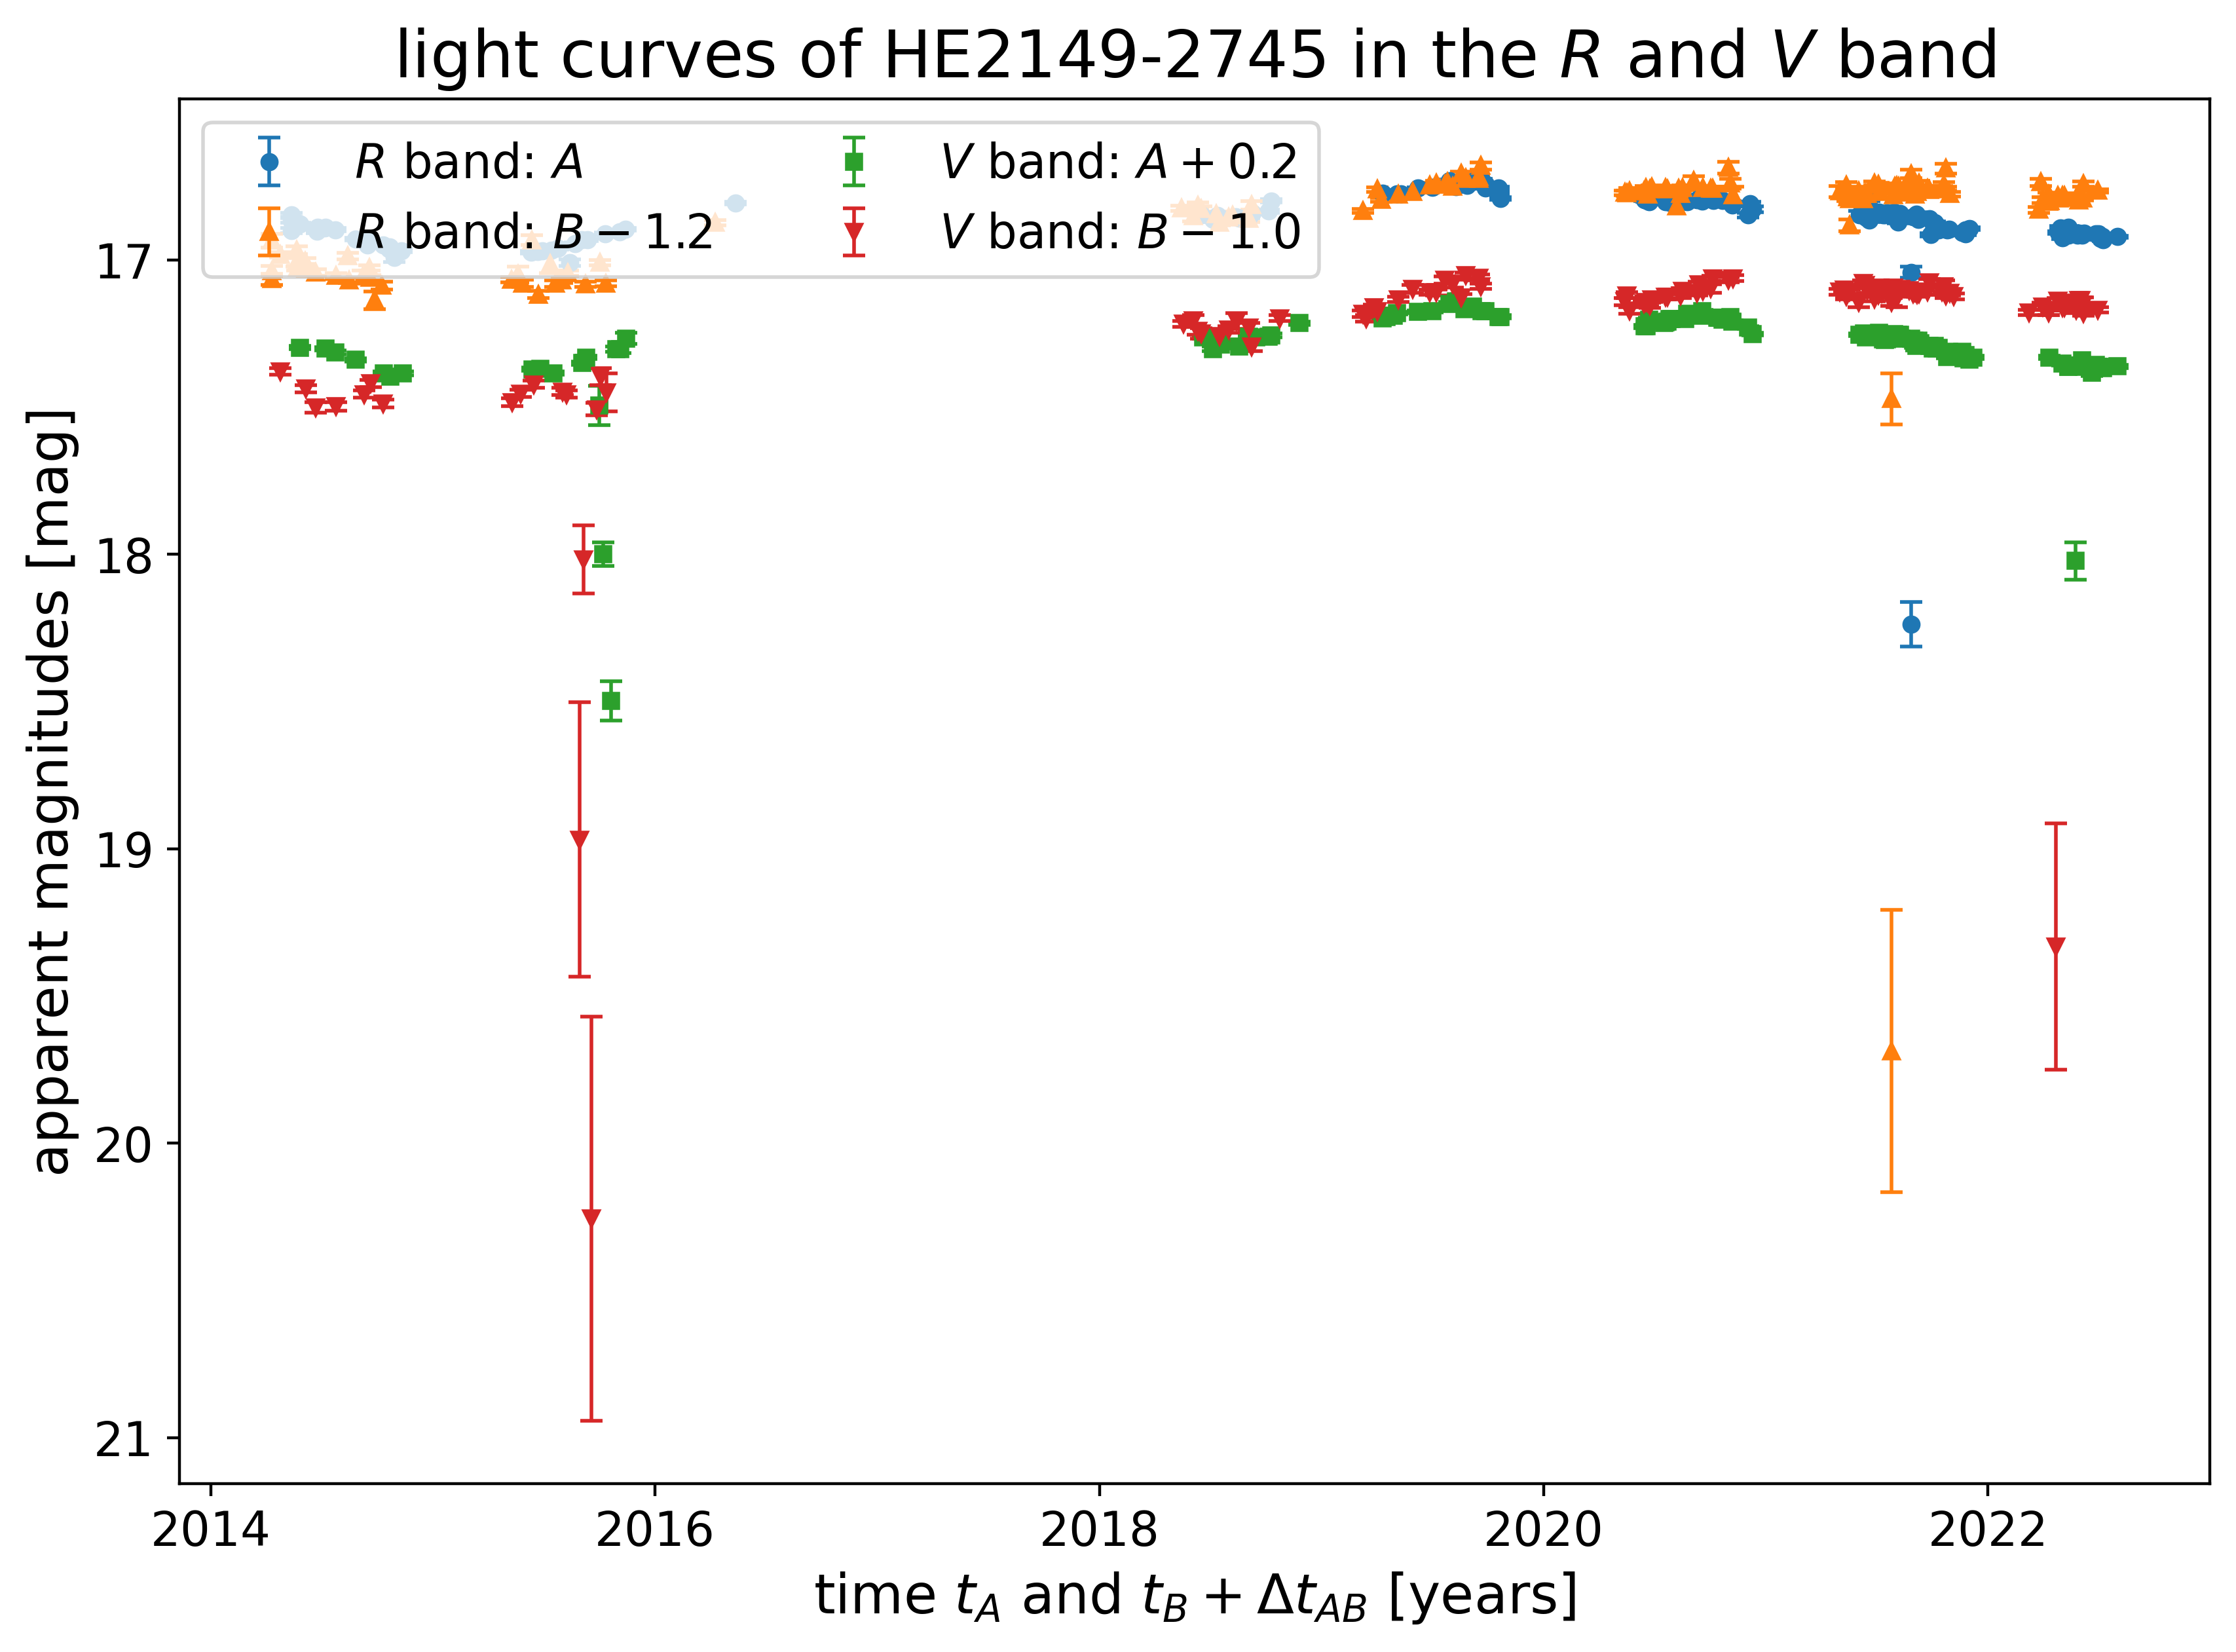

In [8]:
plt.figure(figsize=(10,7),dpi=400)
plt.title('light curves of HE2149-2745 in the $R$ and $V$ band',size=18)
plot(R_mag,0.0,-1.2,'$R$ band: $A$','$R$ band: $B-1.2$','o','^',-32.4/365.25)
plot(V_mag,0.2,-1.0,'$V$ band: $A+0.2$','$V$ band: $B-1.0$','s','v',-32.4/365.25)
plt.gca().invert_yaxis()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('time $t_A$ and $t_B+\Delta t_{AB}$ [years]',size=15)
plt.ylabel('apparent magnitudes [mag]',size=15)
plt.legend(fontsize=13,loc='upper left',ncol=2)

In [9]:
def mask(alldata,refdata):
    sky     = alldata[5]
    residue = alldata[6]
    chi2red = alldata[7]
    
    fluxA   = alldata[1]+refdata[1]
    fluxAer = alldata[2]
    fluxB   = alldata[3]+refdata[3]
    fluxBer = alldata[4]
    #print(np.abs(fluxA/fluxAer),np.abs(fluxB/fluxBer))
    
    max_chi = 5.0
    max_sky = 10.0
    max_res = 15.0 #20.0
    
    #mask = np.abs(np.where(chi2red>max_chi,0,1)*np.where(sky>max_sky,0,1)*np.where(residue>max_res,0,1)-1)
    
    mask = np.abs(np.where(np.abs(fluxAer/fluxA)>0.02,0,1)-1)
    keep=mask==1
    index=np.arange(len(keep))    
    print (index[keep],(fluxAer/fluxA)[keep])
    
    #print(index[keep])
    #print ((sky/sky_err)[keep])
    
    only_chi2red_mask = False
    if only_chi2red_mask:
        max_chi = 5.0
        min_chi = 0.2
        mask = np.abs(np.where(chi2red>max_chi,0,1)*np.where(chi2red<min_chi,0,1)-1)
        
    chi2red_sky_mask = False
    if chi2red_sky_mask:
        max_chi = 4.0
        min_chi = 0.5
        max_sky = 5.0
        mask = np.abs(np.where(chi2red>max_chi,0,1)*np.where(chi2red<min_chi,0,1)*np.where(sky>max_sky,0,1)-1)
    
    justchi = False
    if justchi:
        max_chi = 5.0
        mask = np.abs(np.where(chi2red>max_chi,0,1)-1)  
    
    return mask

R_mask = mask(R_all,R_ref)
V_mask = mask(V_all,V_ref)
print(R_mask.sum(),V_mask.sum())

[15] [0.06926901]
[28 32 47 70] [0.05823687 0.06084711 0.06116374 0.03591444]
1 4


In [10]:
def masked_mag(mag,mask):
    time = np.ma.compressed(np.ma.array(mag[0],mask=mask))
    magA = np.ma.compressed(np.ma.array(mag[1],mask=mask))
    magA_err = np.ma.compressed(np.ma.array(mag[2],mask=mask))
    magB = np.ma.compressed(np.ma.array(mag[3],mask=mask))
    magB_err = np.ma.compressed(np.ma.array(mag[4],mask=mask))
    return time,magA,magA_err,magB,magB_err

R_mag_masked = masked_mag(R_mag,R_mask)
V_mag_masked = masked_mag(V_mag,V_mask)

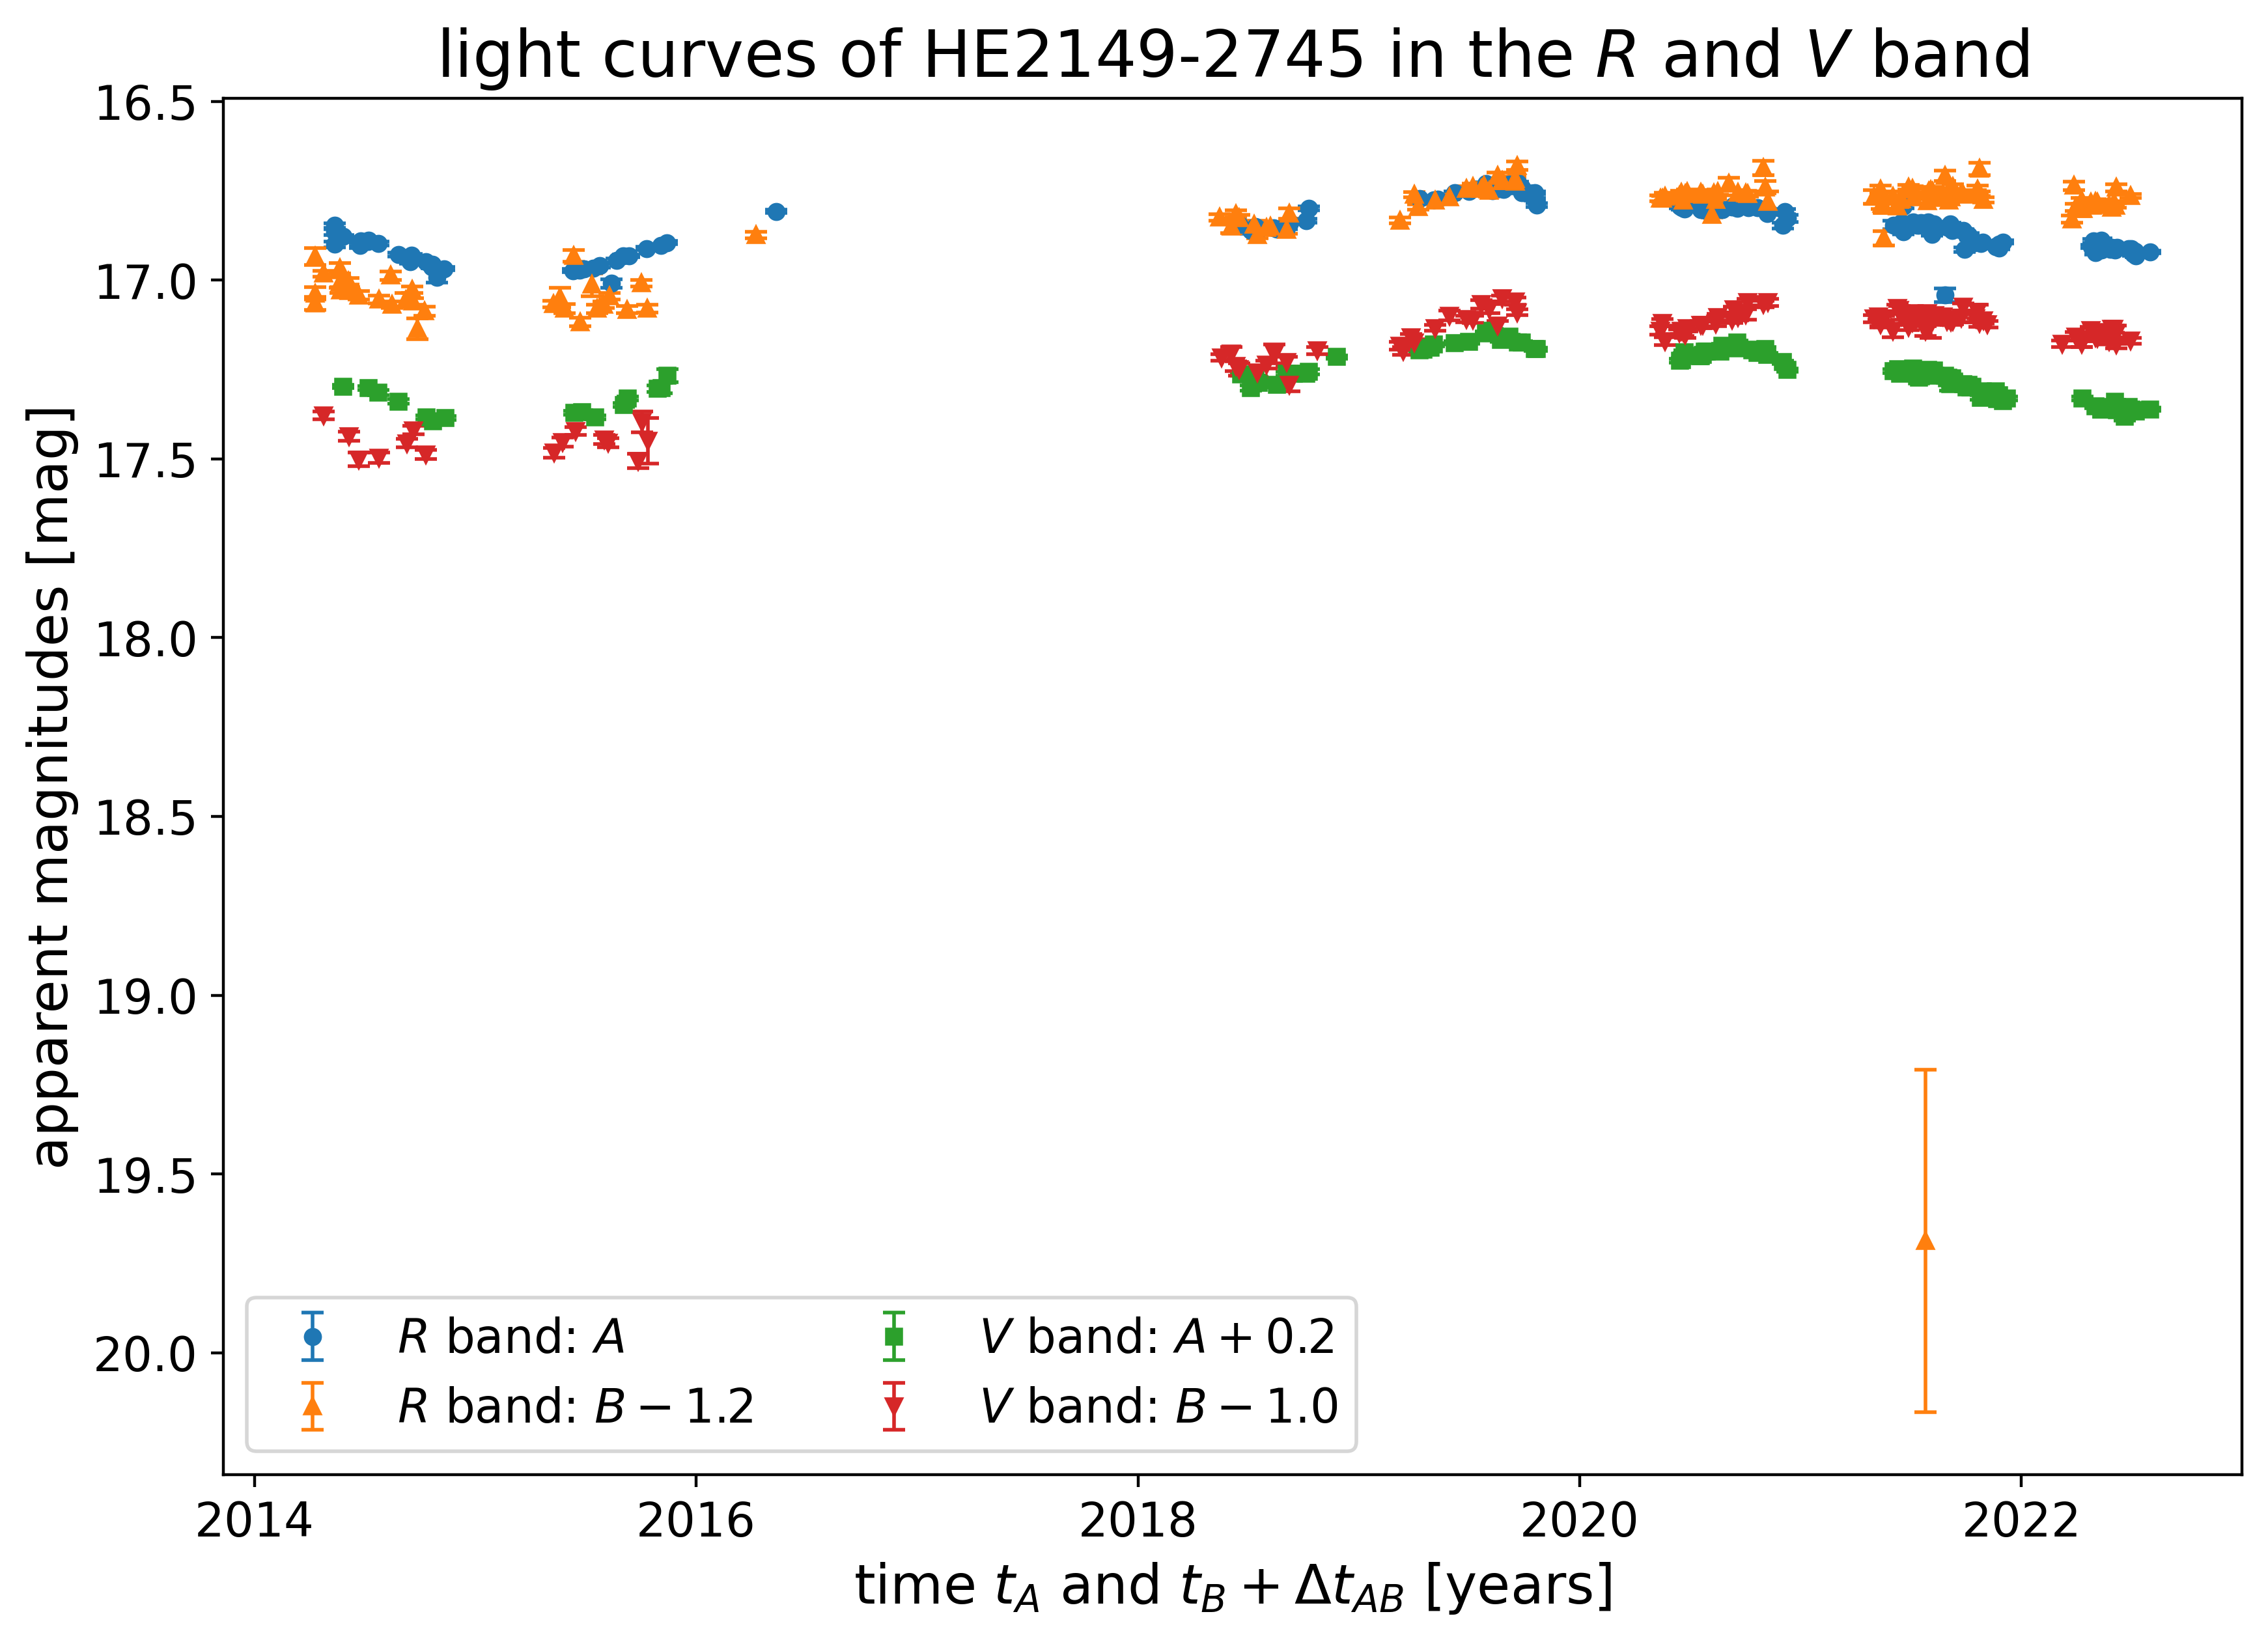

In [11]:
plt.figure(figsize=(10,7),dpi=400)
plt.title('light curves of HE2149-2745 in the $R$ and $V$ band',size=18)
plot(R_mag_masked,0.0,-1.2,'$R$ band: $A$','$R$ band: $B-1.2$','o','^',-32.4/365.25)
plot(V_mag_masked,0.2,-1.0,'$V$ band: $A+0.2$','$V$ band: $B-1.0$','s','v',-32.4/365.25)
#plt.ylim([16.51,17.69])
plt.gca().invert_yaxis()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('time $t_A$ and $t_B+\Delta t_{AB}$ [years]',size=15)
plt.ylabel('apparent magnitudes [mag]',size=15)
plt.legend(fontsize=13,ncol=2)

In [12]:
def newmask(alldata,refdata):
    fluxA   = alldata[1]+refdata[1]
    fluxAer = np.sqrt(alldata[2]*alldata[2]+refdata[2]*refdata[2])
    fluxB   = alldata[3]+refdata[3]
    fluxBer = np.sqrt(alldata[4]*alldata[4]+refdata[4]*refdata[4])
    sky     = alldata[5]
    residue = alldata[6]
    chi2red = alldata[7]

    max_rel_flux_err = 0.07
    mrfe = max_rel_flux_err
    
    mask = np.abs(np.where(np.abs(fluxAer/fluxA)>mrfe,0,1)*np.where(np.abs(fluxBer/fluxB)>mrfe,0,1)-1)
    keep=mask==1
    index=np.arange(len(keep))    
    print('file index',index[keep])
    print('flux A/err',(fluxAer/fluxA)[keep])
    print('flux B/err',(fluxBer/fluxB)[keep])
    print('background',sky[keep])
    print('residue   ',residue[keep])
    print('chr2red   ',chi2red[keep])
    
    return mask

R_newmask = newmask(R_all,R_ref)
print('')
V_newmask = newmask(V_all,V_ref)
print('')
print('masked in R:',R_newmask.sum())
print('masked in V:',V_newmask.sum())

R_mag_newmasked = masked_mag(R_mag,R_newmask)
V_mag_newmasked = masked_mag(V_mag,V_newmask)

file index [15 70]
flux A/err [0.06955786 0.01747969]
flux B/err [0.07966166 0.44091675]
background [5.85 5.1 ]
residue    [39.204 20.758]
chr2red    [2.011 1.194]

file index [28 32 47 70]
flux A/err [0.05854409 0.06095845 0.06186431 0.03639041]
flux B/err [0.38473086 0.42951071 0.63200503 0.10681512]
background [ 18.54   2.58  27.16 -20.41]
residue    [10.878 40.619 37.569 67.542]
chr2red    [0.731 0.377 0.423 0.424]

masked in R: 2
masked in V: 4


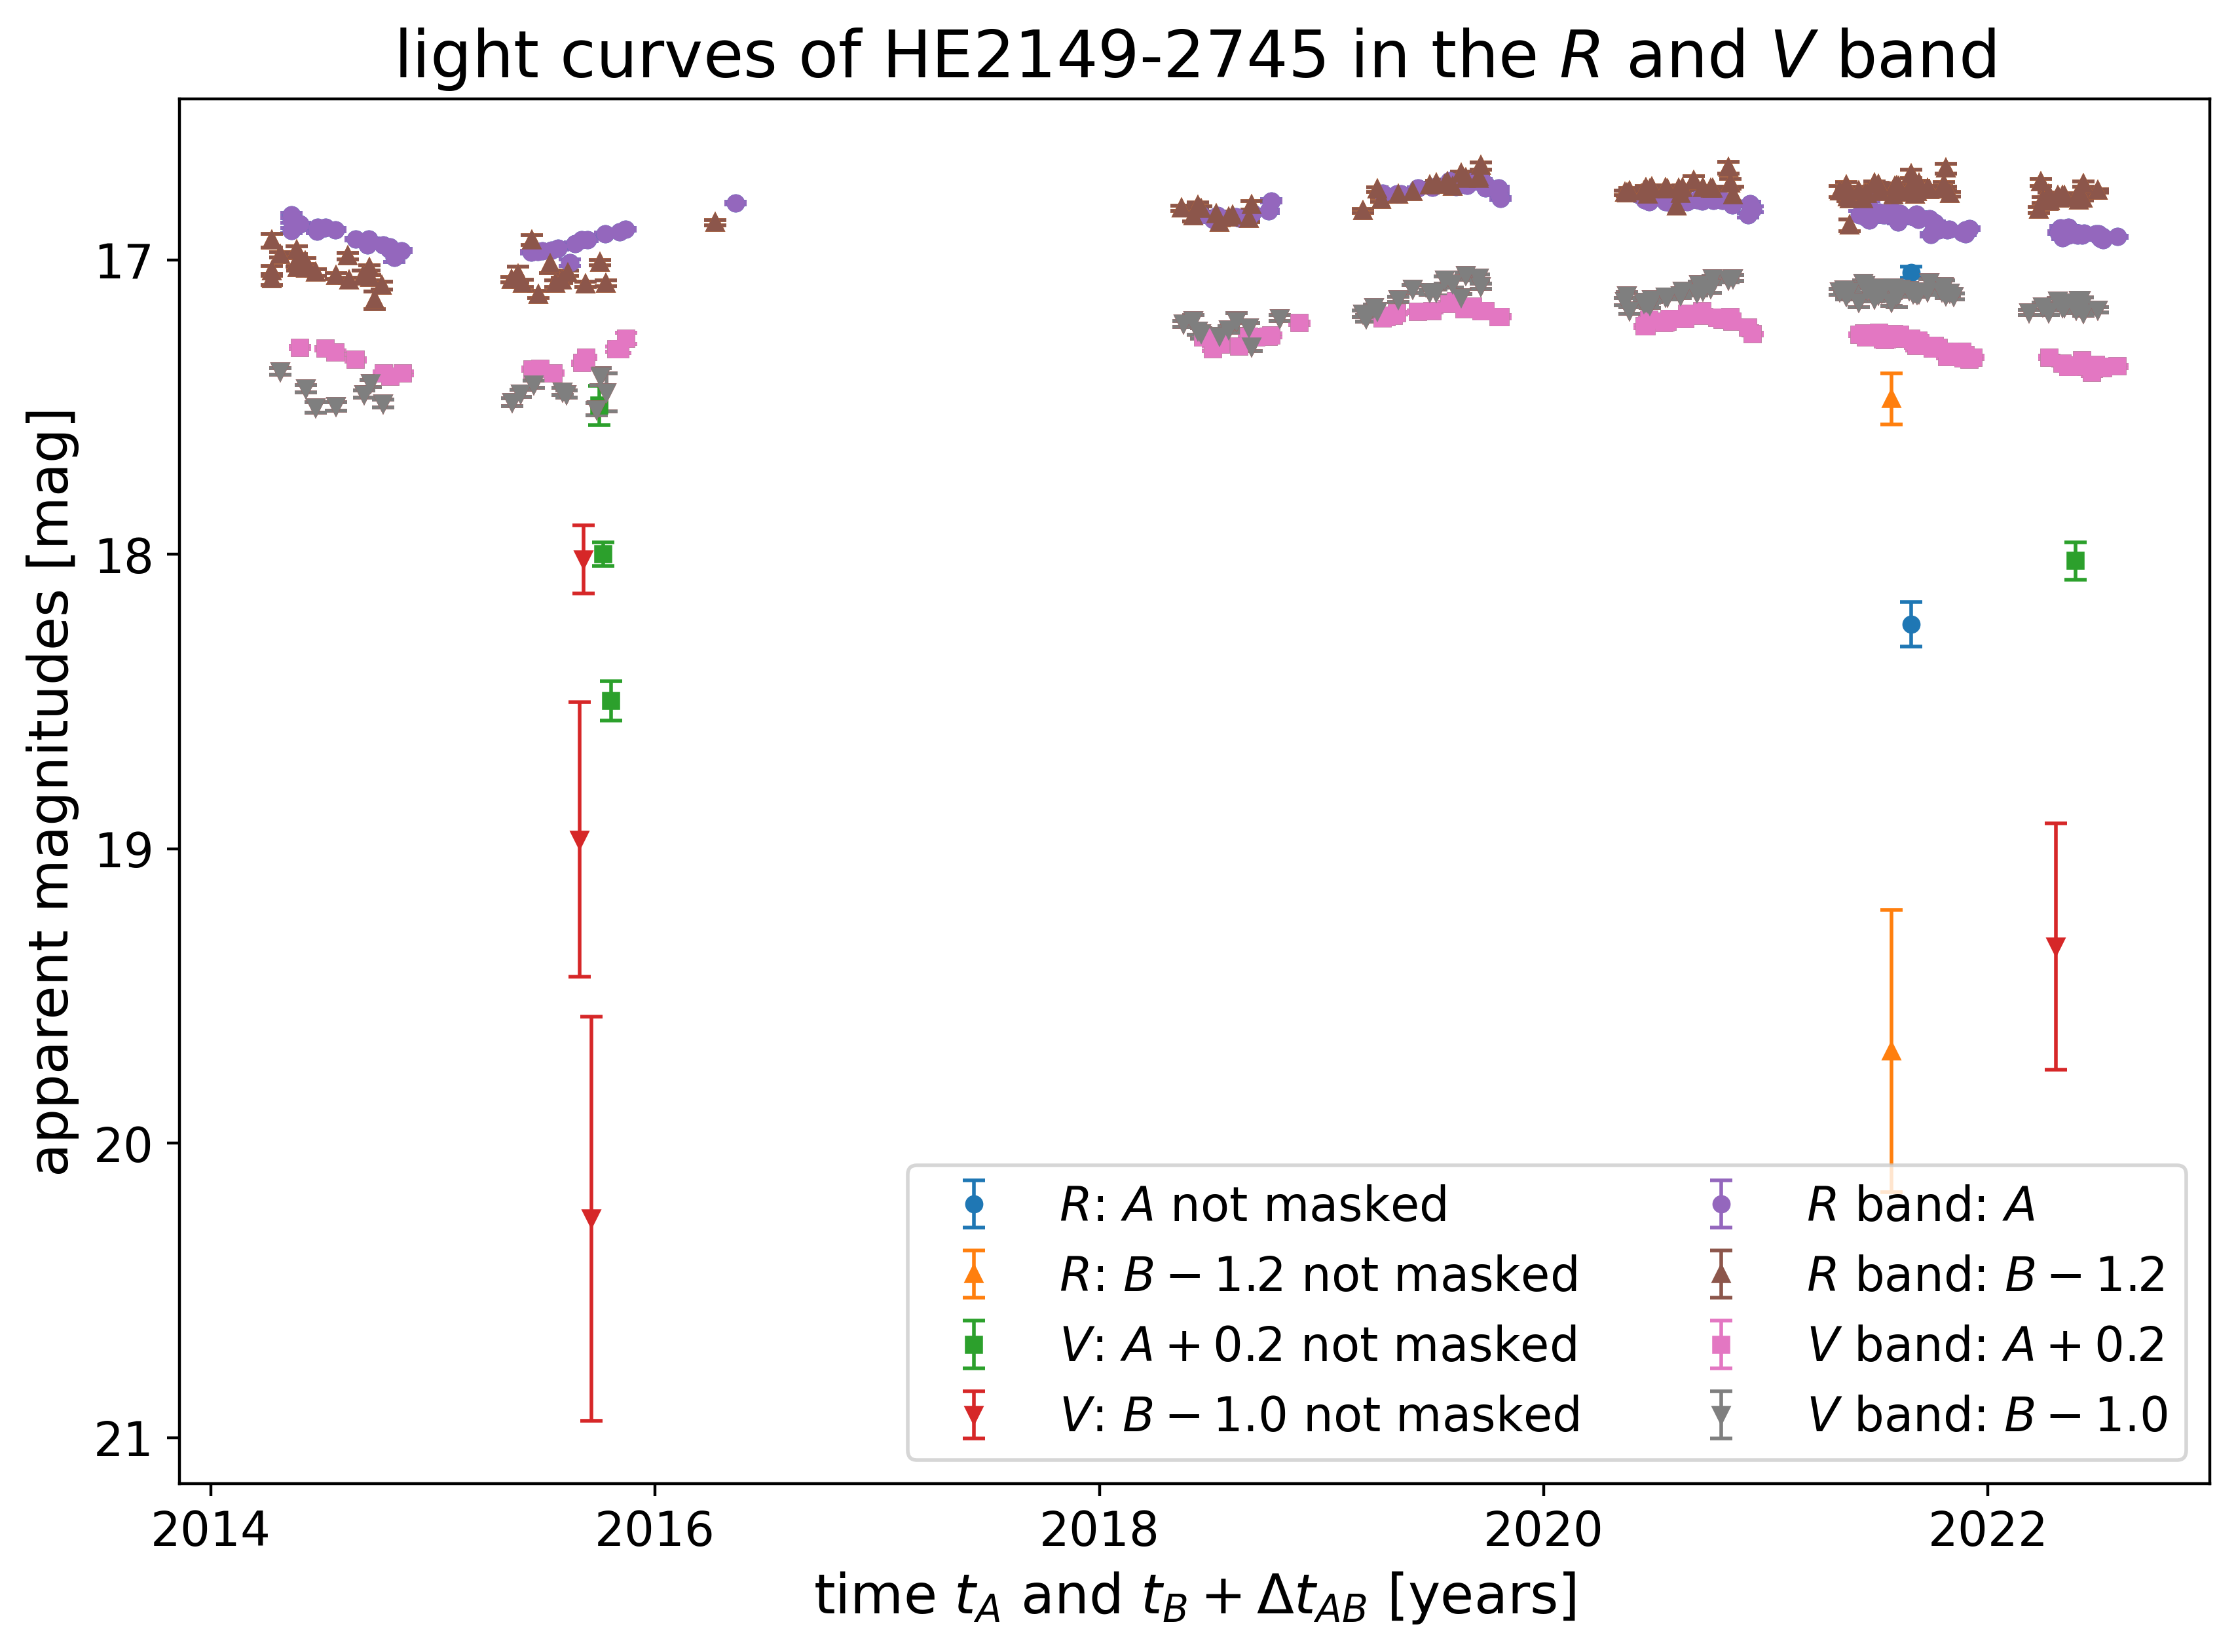

In [13]:
plt.figure(figsize=(10,7),dpi=400)
plt.title('light curves of HE2149-2745 in the $R$ and $V$ band',size=18)
plot(R_mag,0.0,-1.2,'$R$: $A$ not masked','$R$: $B-1.2$ not masked','o','^',-32.4/365.25)
plot(V_mag,0.2,-1.0,'$V$: $A+0.2$ not masked','$V$: $B-1.0$ not masked','s','v',-32.4/365.25)
plot(R_mag_newmasked,0.0,-1.2,'$R$ band: $A$','$R$ band: $B-1.2$','o','^',-32.4/365.25)
plot(V_mag_newmasked,0.2,-1.0,'$V$ band: $A+0.2$','$V$ band: $B-1.0$','s','v',-32.4/365.25)
plt.gca().invert_yaxis()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('time $t_A$ and $t_B+\Delta t_{AB}$ [years]',size=15)
plt.ylabel('apparent magnitudes [mag]',size=15)
plt.legend(fontsize=13,ncol=2)

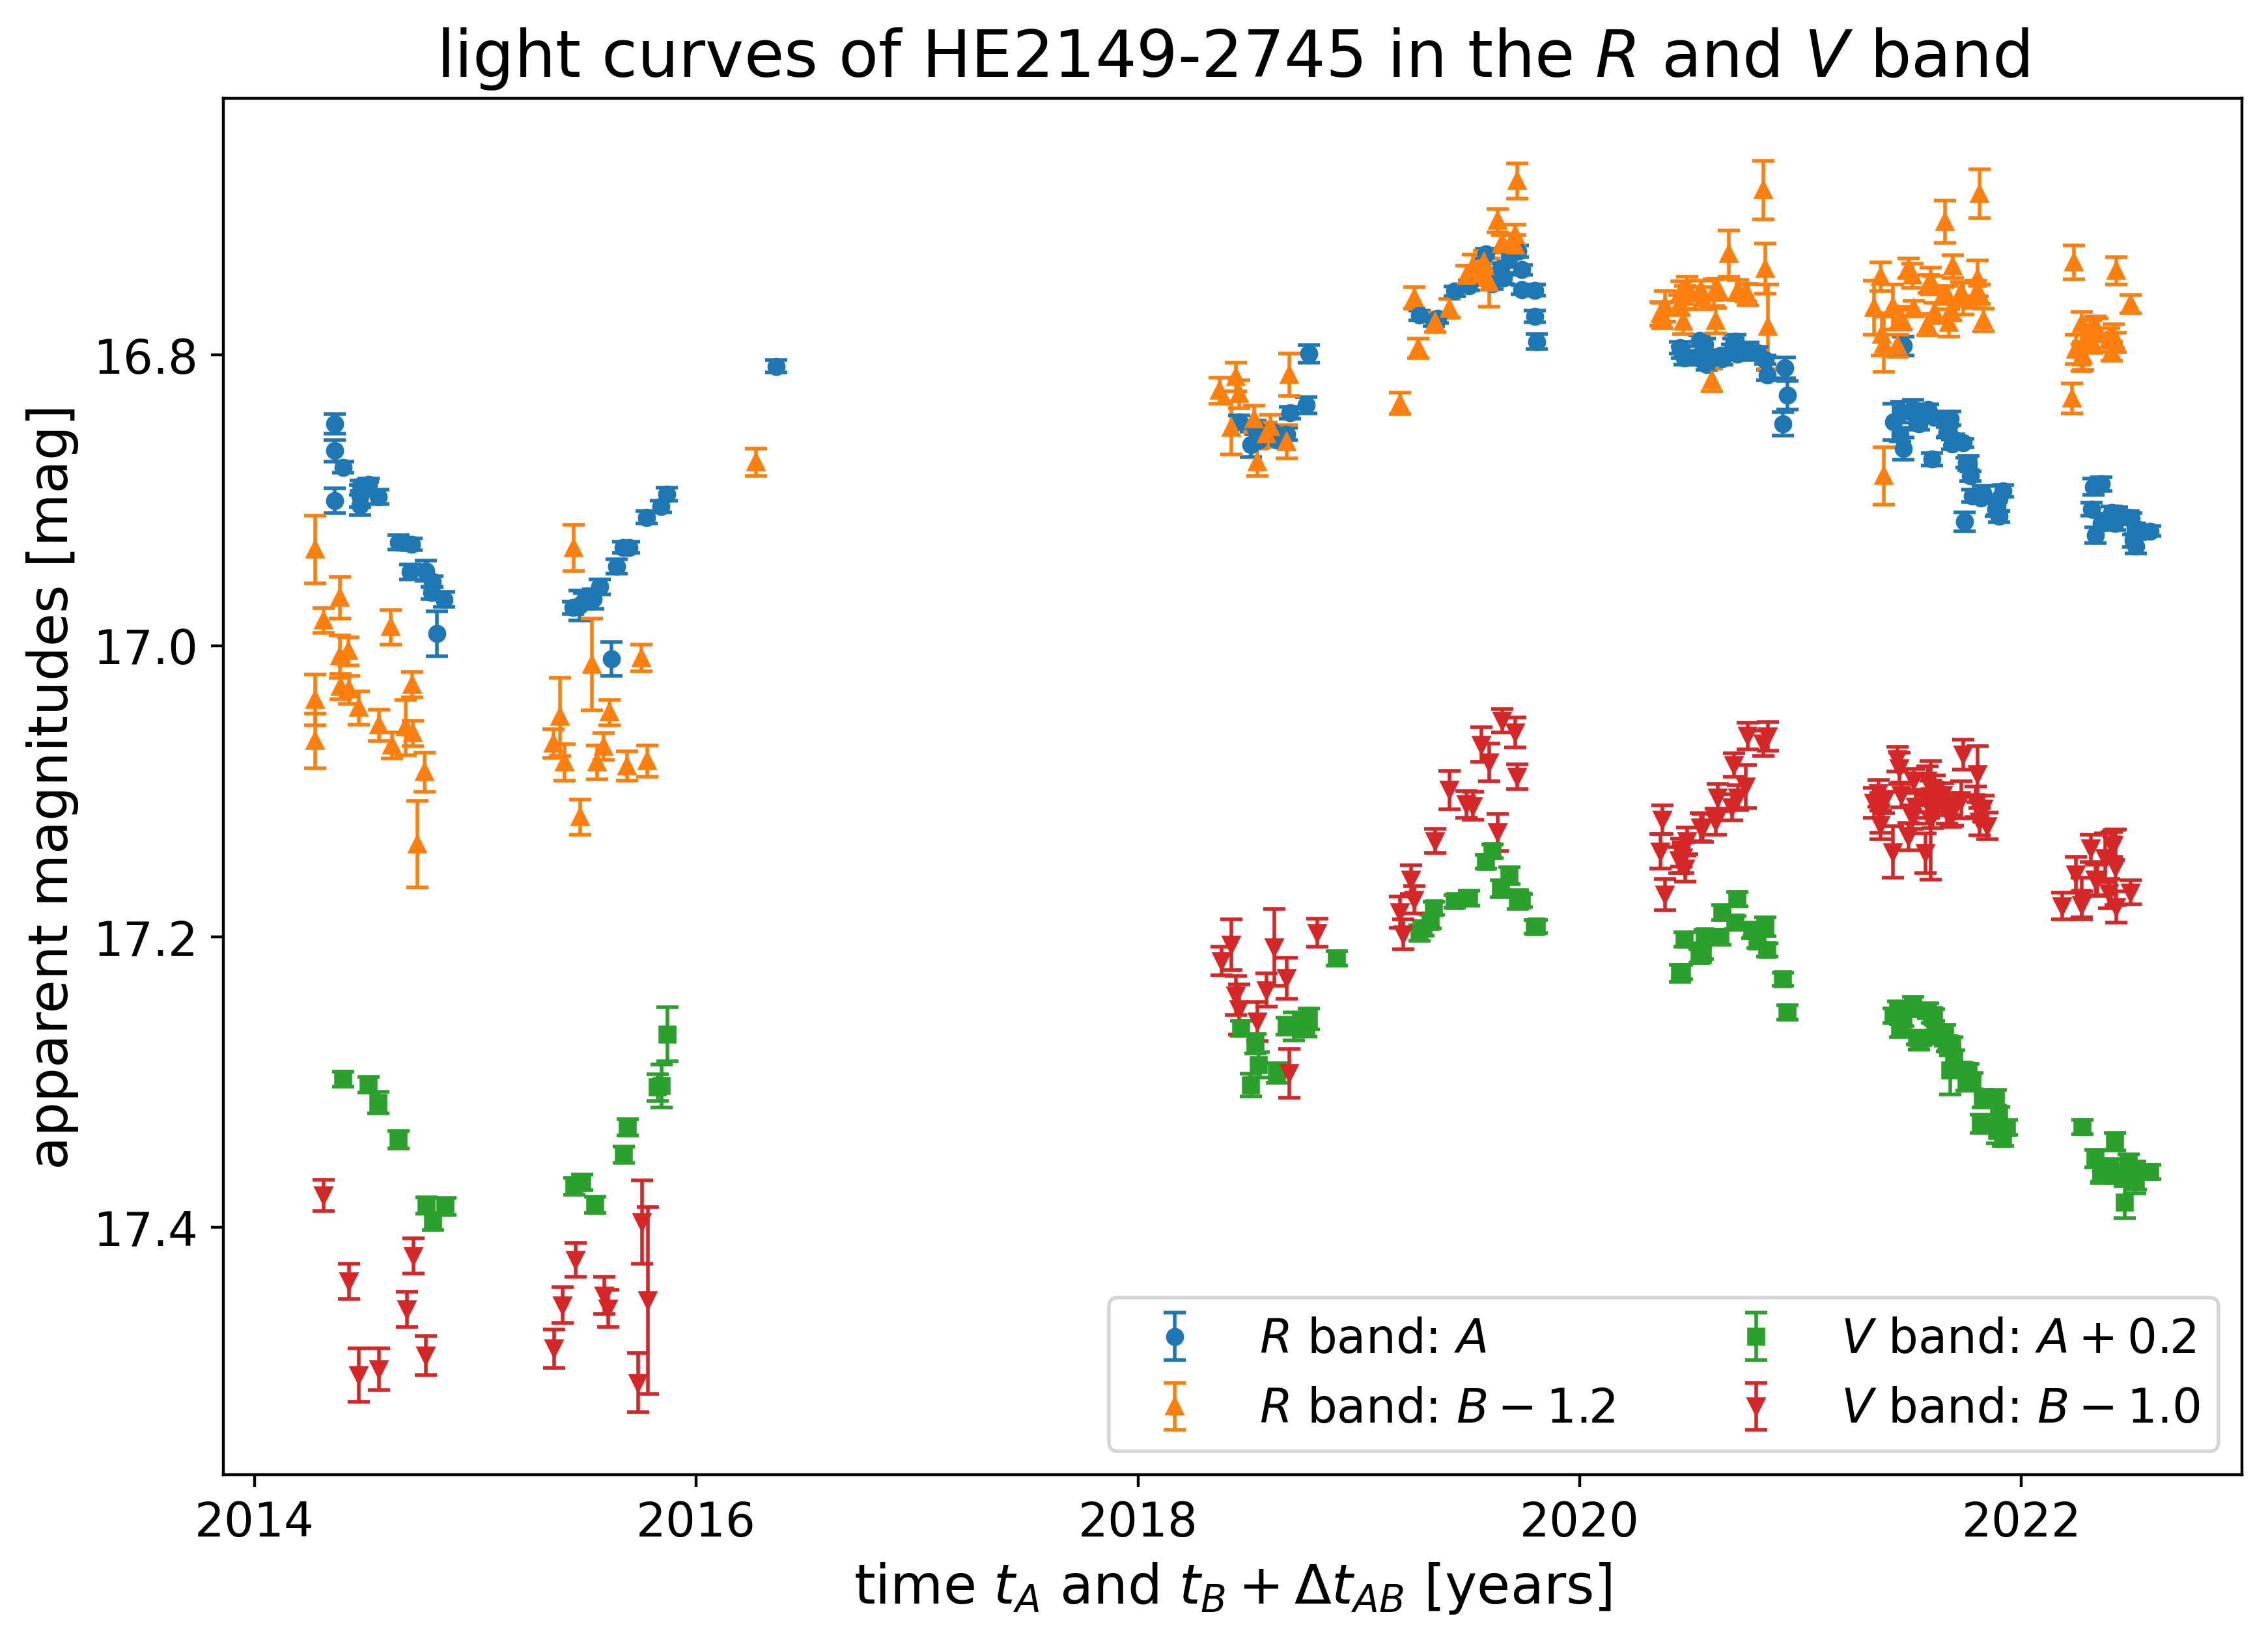

In [14]:
plt.figure(figsize=(10,7),dpi=400)
plt.title('light curves of HE2149-2745 in the $R$ and $V$ band',size=18)
plot(R_mag_newmasked,0.0,-1.2,'$R$ band: $A$','$R$ band: $B-1.2$','o','^',-32.4/365.25)
plot(V_mag_newmasked,0.2,-1.0,'$V$ band: $A+0.2$','$V$ band: $B-1.0$','s','v',-32.4/365.25)
plt.gca().invert_yaxis()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('time $t_A$ and $t_B+\Delta t_{AB}$ [years]',size=15)
plt.ylabel('apparent magnitudes [mag]',size=15)
plt.legend(fontsize=13,ncol=2)

0.6861907436158807


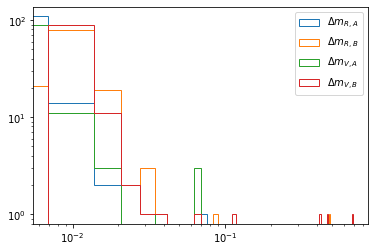

In [15]:
max_mag_err = np.max([np.max(R_mag[2]),np.max(R_mag[4]),np.max(V_mag[2]),np.max(V_mag[4])])
print(max_mag_err)
bins = np.linspace(0.0,max_mag_err,num=100,endpoint=True)
plt.hist(R_mag[2],bins,histtype='step',label='$\Delta m_{R,A}$')
plt.hist(R_mag[4],bins,histtype='step',label='$\Delta m_{R,B}$')
plt.hist(V_mag[2],bins,histtype='step',label='$\Delta m_{V,A}$')
plt.hist(V_mag[4],bins,histtype='step',label='$\Delta m_{V,B}$')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [16]:
def finalmask(lightcurve):
    mag_A_err = lightcurve[2]
    mag_B_err = lightcurve[4]
    
    max_mag_err = 0.05
    
    mask = np.abs(np.where(np.abs(mag_A_err)>max_mag_err,0,1)*np.where(np.abs(mag_B_err)>max_mag_err,0,1)-1)
    
    return mask

R_finalmask = finalmask(R_mag)
V_finalmask = finalmask(V_mag)
print('masked in R:',R_finalmask.sum())
print('masked in V:',V_finalmask.sum())

R_mag_finalmasked = masked_mag(R_mag,R_finalmask)
V_mag_finalmasked = masked_mag(V_mag,V_finalmask)

masked in R: 2
masked in V: 5


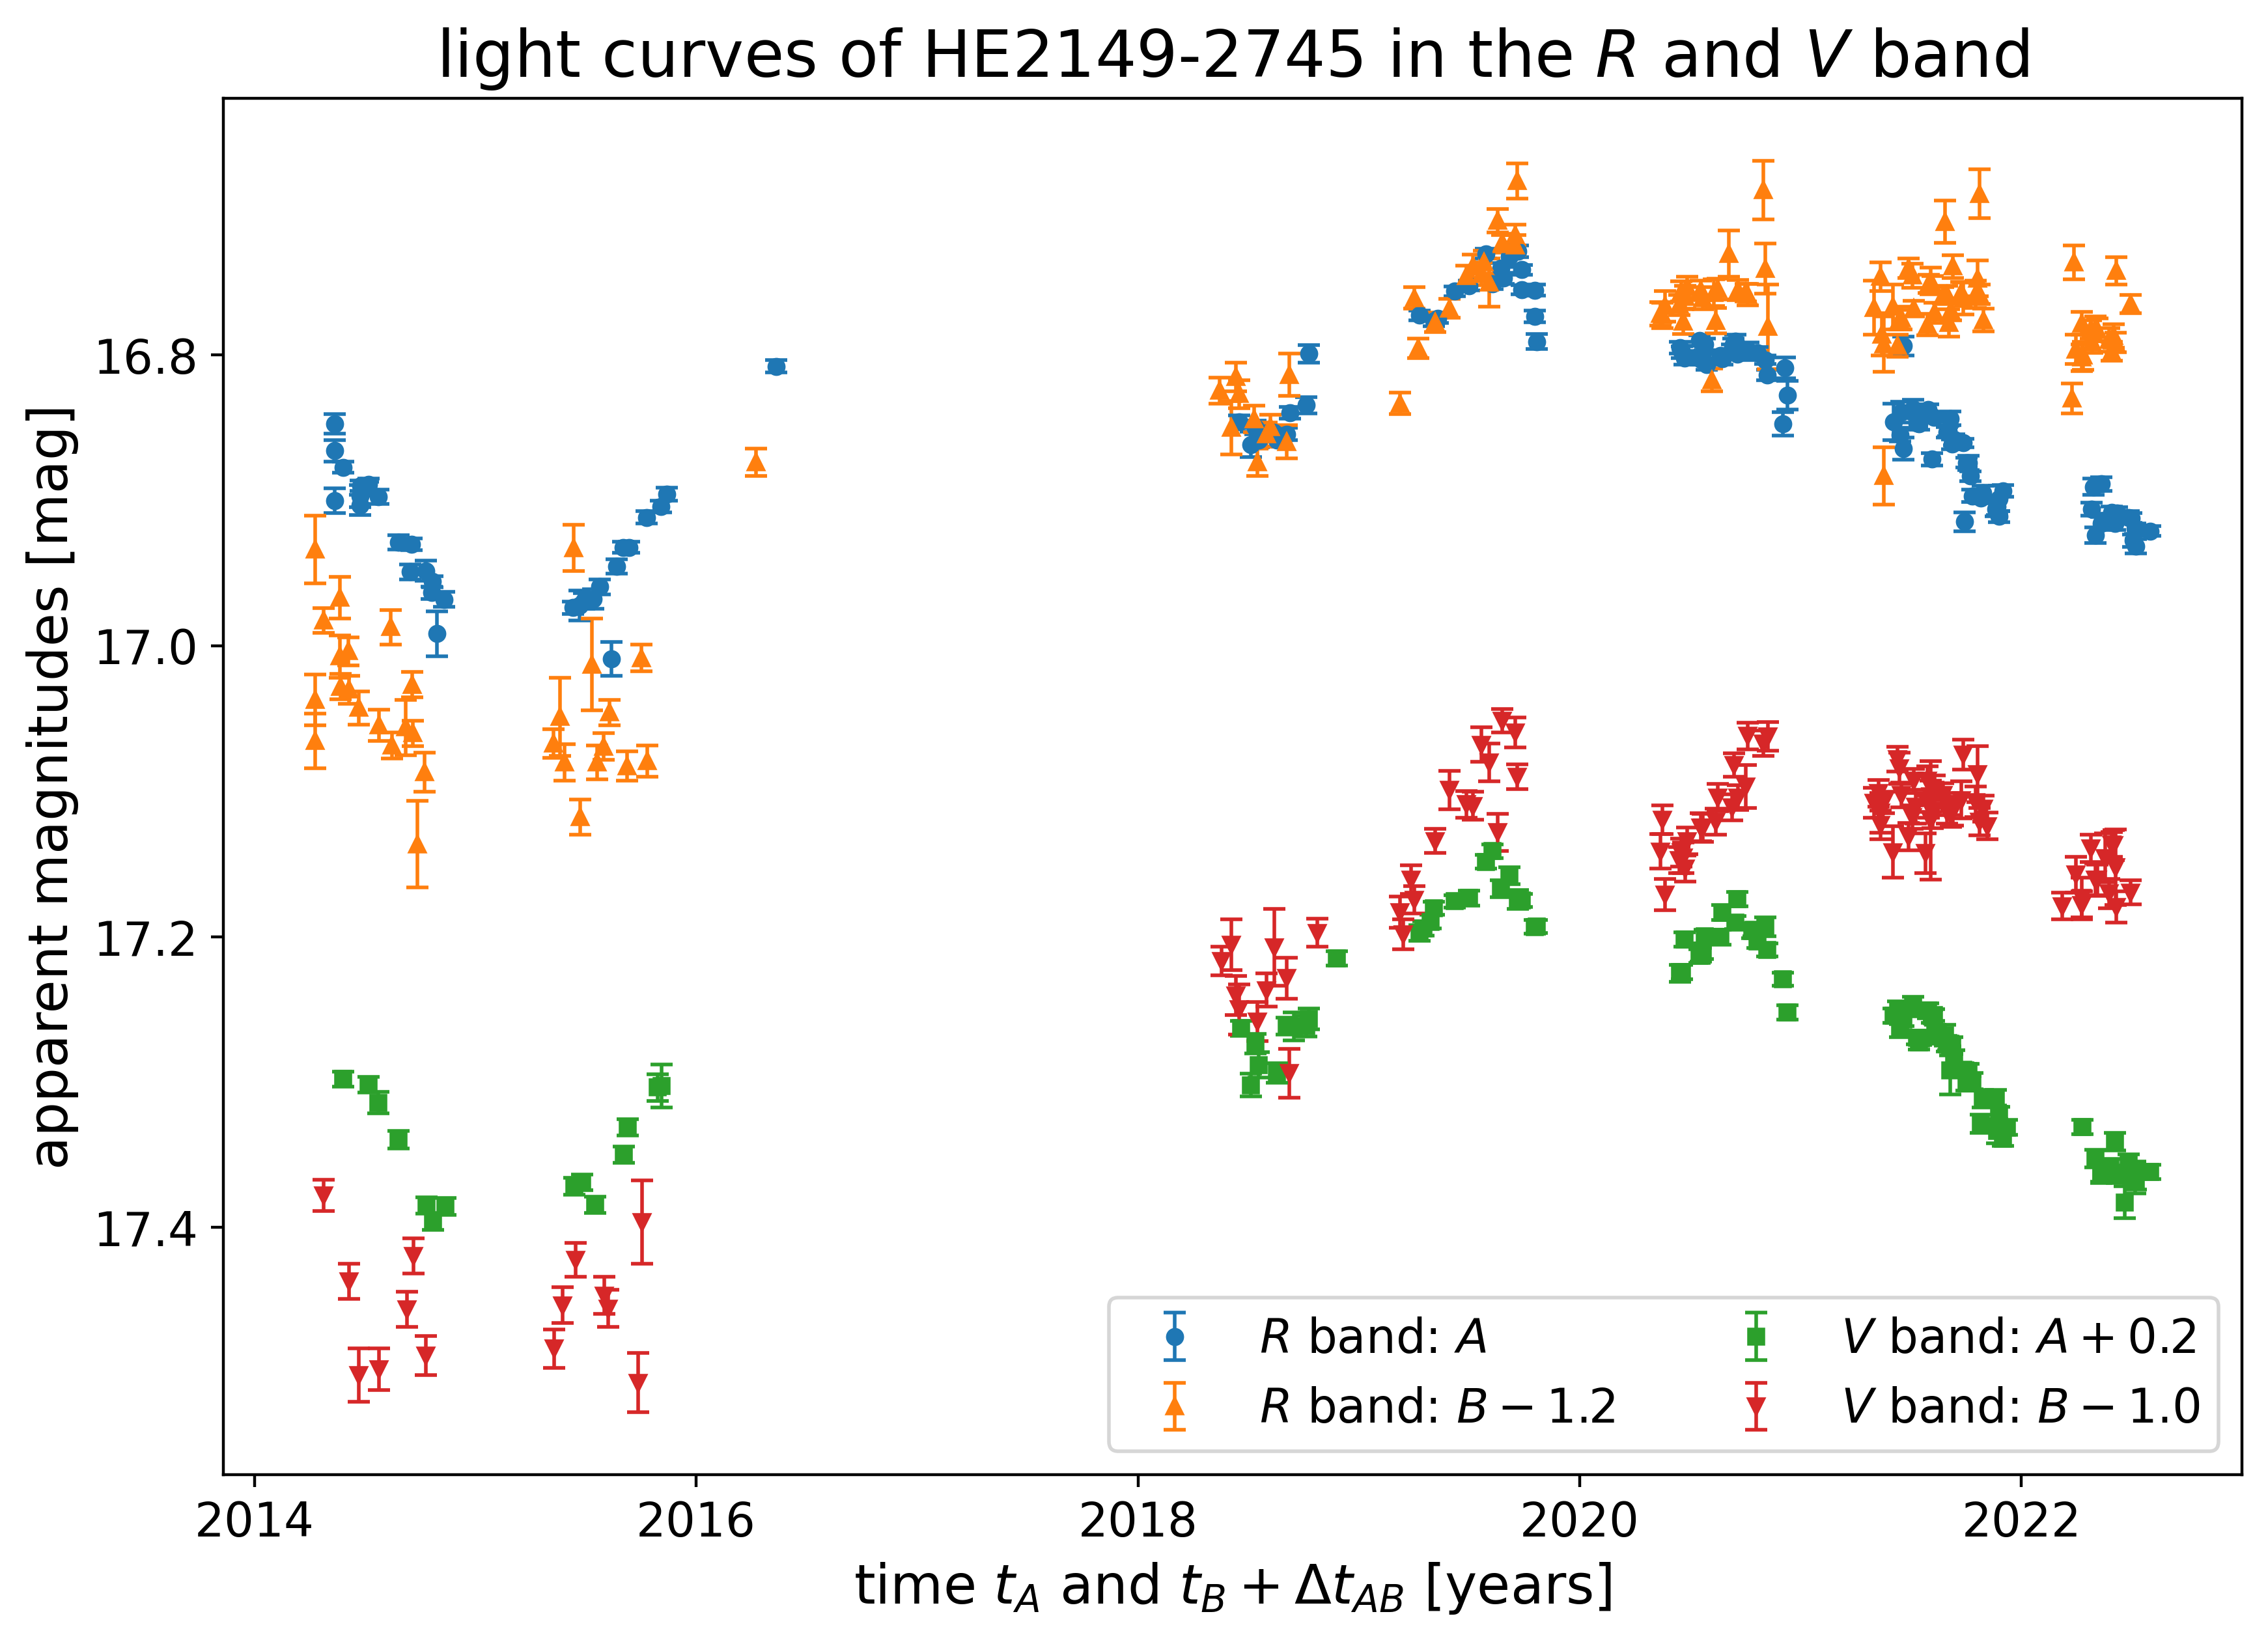

In [17]:
plt.figure(figsize=(10,7),dpi=400)
plt.title('light curves of HE2149-2745 in the $R$ and $V$ band',size=18)
plot(R_mag_finalmasked,0.0,-1.2,'$R$ band: $A$','$R$ band: $B-1.2$','o','^',-32.4/365.25)
plot(V_mag_finalmasked,0.2,-1.0,'$V$ band: $A+0.2$','$V$ band: $B-1.0$','s','v',-32.4/365.25)
plt.gca().invert_yaxis()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('time $t_A$ and $t_B+\Delta t_{AB}$ [years]',size=15)
plt.ylabel('apparent magnitudes [mag]',size=15)
plt.legend(fontsize=13,ncol=2)

In [18]:
def magtxt(quasar,mag):
    txt = open("lightcurves_"+str(quasar)+".txt", "w")
    txt.write("time"+"\t"+"A-mag"+"\t"+"A-err"+"\t"+"B-mag"+"\t"+"B-err"+"\n")
    txt.write("\n")
    for i in range(len(mag[0])):
        txt.write(str(mag[0][i])+"\t"+str(mag[1][i])+"\t"+str(mag[2][i])+"\t"+str(mag[3][i])+"\t"+str(mag[4][i])+"\n")
    txt.close()

In [19]:
magtxt('he2149R',R_mag_finalmasked)
magtxt('he2149V',V_mag_finalmasked)

In [22]:
print(np.sort(R_mag_finalmasked[0]))

[2014.3635 2014.3635 2014.3635 2014.4018 2014.4769 2014.4769 2014.4797
 2014.5137 2014.5164 2014.5603 2014.6518 2014.705  2014.7105 2014.7747
 2014.8021 2014.8048 2014.8267 2014.858  2015.4413 2015.4715 2015.4934
 2015.5329 2015.563  2015.6162 2015.6409 2015.6694 2015.6968 2015.7747
 2015.8416 2015.8662 2016.3607 2018.4578 2018.511  2018.5329 2018.5466
 2018.6135 2018.6299 2018.6721 2018.6886 2018.761  2018.7747 2019.2747
 2019.3388 2019.358  2019.4331 2019.5    2019.5767 2019.6053 2019.6436
 2019.6546 2019.6804 2019.7187 2019.7379 2019.7379 2019.7966 2019.7966
 2019.8048 2020.455  2020.4632 2020.4742 2020.5411 2020.5493 2020.5575
 2020.5658 2020.574  2020.6381 2020.6463 2020.6886 2020.6968 2020.705
 2020.7132 2020.7637 2020.8048 2020.8416 2020.8498 2020.9194 2020.9276
 2020.9413 2021.4221 2021.4495 2021.4578 2021.466  2021.466  2021.5082
 2021.5274 2021.5356 2021.5438 2021.5767 2021.5943 2021.6025 2021.6628
 2021.6694 2021.6776 2021.6858 2021.6941 2021.7352 2021.7434 2021.7527
 2021.7

In [107]:
import glob
from astropy.io import fits
from astropy.time import Time

def bettertime(band,file,mask,mag):
    
    table = open(band+'/diff_galfit/'+file,'r')
    lines = table.readlines()[4:]
    notmaskeddates = np.ma.compressed(np.ma.array(np.arange(len(lines)),mask=mask))
    times = np.zeros(len(notmaskeddates))
    k = 0
    for i in notmaskeddates:
        fitsname = (lines[i].split('.fits')[0].replace('diff_',''))
        fitsfiles = list(glob.glob(band+'/raw/'+fitsname+'*.fits'))
        fitstimes = np.zeros(len(fitsfiles))
        for j in range(len(fitsfiles)):
            data = fits.open(fitsfiles[j])
            fitstimes[j] = data[0].header['MJD-OBS']
        meanMJD = np.mean(fitstimes)
        times[k] = Time(meanMJD,format='mjd').decimalyear
        k = k + 1
    if len(mag[0]) != len(times):
        print('WARNING!!!')
    difftest = np.array([np.mean(times - mag[0]),np.max(np.abs(times - mag[0]))])
    print('mean and maximal local date calc. time to mjd calc. time in days:',difftest*365.25)
        
    return times

betterRtime = bettertime('R',data_file_name,R_finalmask,R_mag_finalmasked)
betterVtime = bettertime('V',data_file_name,V_finalmask,V_mag_finalmasked)
#print(betterRtime,betterVtime)

mean and maximal local date calc. time to mjd calc. time in days: [0.23101515 1.11307722]
mean and maximal local date calc. time to mjd calc. time in days: [0.23036914 1.12368025]


In [120]:
def overwritetime(mag,bettertime):
    return bettertime,mag[1],mag[2],mag[3],mag[4]
    
R_mag_finalmaskedandtime = overwritetime(R_mag_finalmasked,betterRtime)
V_mag_finalmaskedandtime = overwritetime(V_mag_finalmasked,betterVtime)

for i in range(5):
    print(i)
    print(R_mag_finalmasked[i][0:5]-R_mag_finalmaskedandtime[i][0:5])
    print(V_mag_finalmasked[i][0:5]-V_mag_finalmaskedandtime[i][0:5])

0
[-0.00040692 -0.00111694 -0.00111518  0.0005612  -0.00239721]
[ 0.00032051  0.00130022 -0.00036441 -0.00261098 -0.0010275 ]
1
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
2
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
3
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
4
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]


In [121]:
magtxt('he2149R',R_mag_finalmaskedandtime)
magtxt('he2149V',V_mag_finalmaskedandtime)